# Análisis exploratorio de datos- Datasets 'victimas' y 'homicidios'

Para comenzar, se importan las librerias necesarias.

In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from math import ceil
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import re

### Se traen los archivos limpios para comenzar el análisis.

In [127]:
df_victimas=pd.read_csv('victimaslimpio.csv')
df_homicidios=pd.read_csv('homicidioslimpio.csv')

### Visualizamos la información asociada al dataframe 'victimas'

In [49]:
df_victimas.head()

,Unnamed: 0,ID_hecho,FECHA,ROL_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,FECHA_FALLECIMIENTO
0,0,20160001,2016-01-01,CONDUCTOR,MASCULINO,19,2016-01-01
1,1,20160002,2016-01-02,CONDUCTOR,MASCULINO,70,2016-01-02
2,2,20160003,2016-01-03,CONDUCTOR,MASCULINO,30,2016-01-03
3,3,20160004,2016-01-10,CONDUCTOR,MASCULINO,18,NaN
4,4,20160005,2016-01-21,CONDUCTOR,MASCULINO,29,2016-02-01


In [50]:
df_victimas['FECHA'] = pd.to_datetime(df_victimas['FECHA'], errors='coerce')
df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'], errors='coerce')

In [51]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           717 non-null    int64         
 1   ID_hecho             717 non-null    int64         
 2   FECHA                717 non-null    datetime64[ns]
 3   ROL_VICTIMA          717 non-null    object        
 4   SEXO_VICTIMA         717 non-null    object        
 5   EDAD_VICTIMA         717 non-null    object        
 6   FECHA_FALLECIMIENTO  648 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 39.3+ KB


In [52]:
df_victimas['ID_hecho'].value_counts()

ID_hecho
20170035    3
20170050    2
20160041    2
20180015    2
20200063    2
           ..
20170115    1
20170116    1
20170118    1
20170120    1
20210096    1
Name: count, Length: 696, dtype: int64

Existen 21 'ID_hecho' duplicados. Esto obedece a los accidentes que tuvieron más de una víctima mortal.

### Visualizamos la información asociada al dataframe 'homicidios'

In [53]:
df_homicidios.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
0,0,0,0,0,0,20160001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,MOTO-AUTO,MOTO,AUTO
1,1,1,1,1,1,20160002,1,2016-01-02,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,9,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2,2,2,2,2,20160003,1,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,1,MOTO-AUTO,MOTO,AUTO
3,3,3,3,3,3,20160004,1,2016-01-10,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,MOTO-SD,MOTO,SD
4,4,4,4,4,4,20160005,1,2016-01-21,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,MOTO-PASAJEROS,MOTO,PASAJEROS


In [128]:
df_homicidios.loc[df_homicidios['TIPO_DE_CALLE'] == 'GRAL PAZ', 'TIPO_DE_CALLE'] = 'AVENIDA'

In [132]:
df_homicidios.to_csv('homicidioslimpio.csv')

In [130]:
df_homicidios['FECHA'] = pd.to_datetime(df_homicidios['FECHA'], errors='coerce')

In [131]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0.5     696 non-null    int64         
 1   Unnamed: 0.4     696 non-null    int64         
 2   Unnamed: 0.3     696 non-null    int64         
 3   Unnamed: 0.2     696 non-null    int64         
 4   Unnamed: 0.1     696 non-null    int64         
 5   Unnamed: 0       696 non-null    int64         
 6   ID               696 non-null    int64         
 7   N_VICTIMAS       696 non-null    int64         
 8   FECHA            696 non-null    datetime64[ns]
 9   AAAA             696 non-null    int64         
 10  MM               696 non-null    int64         
 11  DD               696 non-null    int64         
 12  HH               696 non-null    object        
 13  LUGAR_DEL_HECHO  696 non-null    object        
 14  TIPO_DE_CALLE    696 non-null    object   

In [133]:
df_homicidios['ID'].value_counts()

ID
20160001    1
20190050    1
20190042    1
20190043    1
20190044    1
           ..
20170111    1
20170112    1
20170113    1
20170114    1
20210097    1
Name: count, Length: 696, dtype: int64

Vemos que en el dataset de homicidios no existe repetición del ID.

## Análisis general de variables

A través de gráficos de barras, se lleva a cabo un análisis de la frecuencia de cada categoría dentro de las variables, permitiendo así identificar aquellas con mayor relevancia.

### Se comenzó con el dataset 'homicidios'

Se comenzó con las variables categóricas

In [59]:
def graf_cat(cat):
    # Calculamos el número de filas que necesitamos
    filas = ceil(cat.shape[1] / 2)
    
    # Definimos el gráfico
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 6))
    
    # Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat
    
    # Definir la paleta de colores
    palette = sns.color_palette("viridis", len(cat.columns))
    
    # Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax=ax[cada], color=palette[cada])
        ax[cada].set_title(variable, fontsize=12, fontweight="bold")
        ax[cada].tick_params(labelsize=10)
    
    plt.tight_layout()
    plt.show()

In [60]:
print('columnas en df_homicidios: ','[' + ', '.join(df_homicidios.keys()) + ']') 

columnas en df_homicidios:  [Unnamed: 0.4, Unnamed: 0.3, Unnamed: 0.2, Unnamed: 0.1, Unnamed: 0, ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, COMUNA, PARTICIPANTES, VICTIMA, ACUSADO]


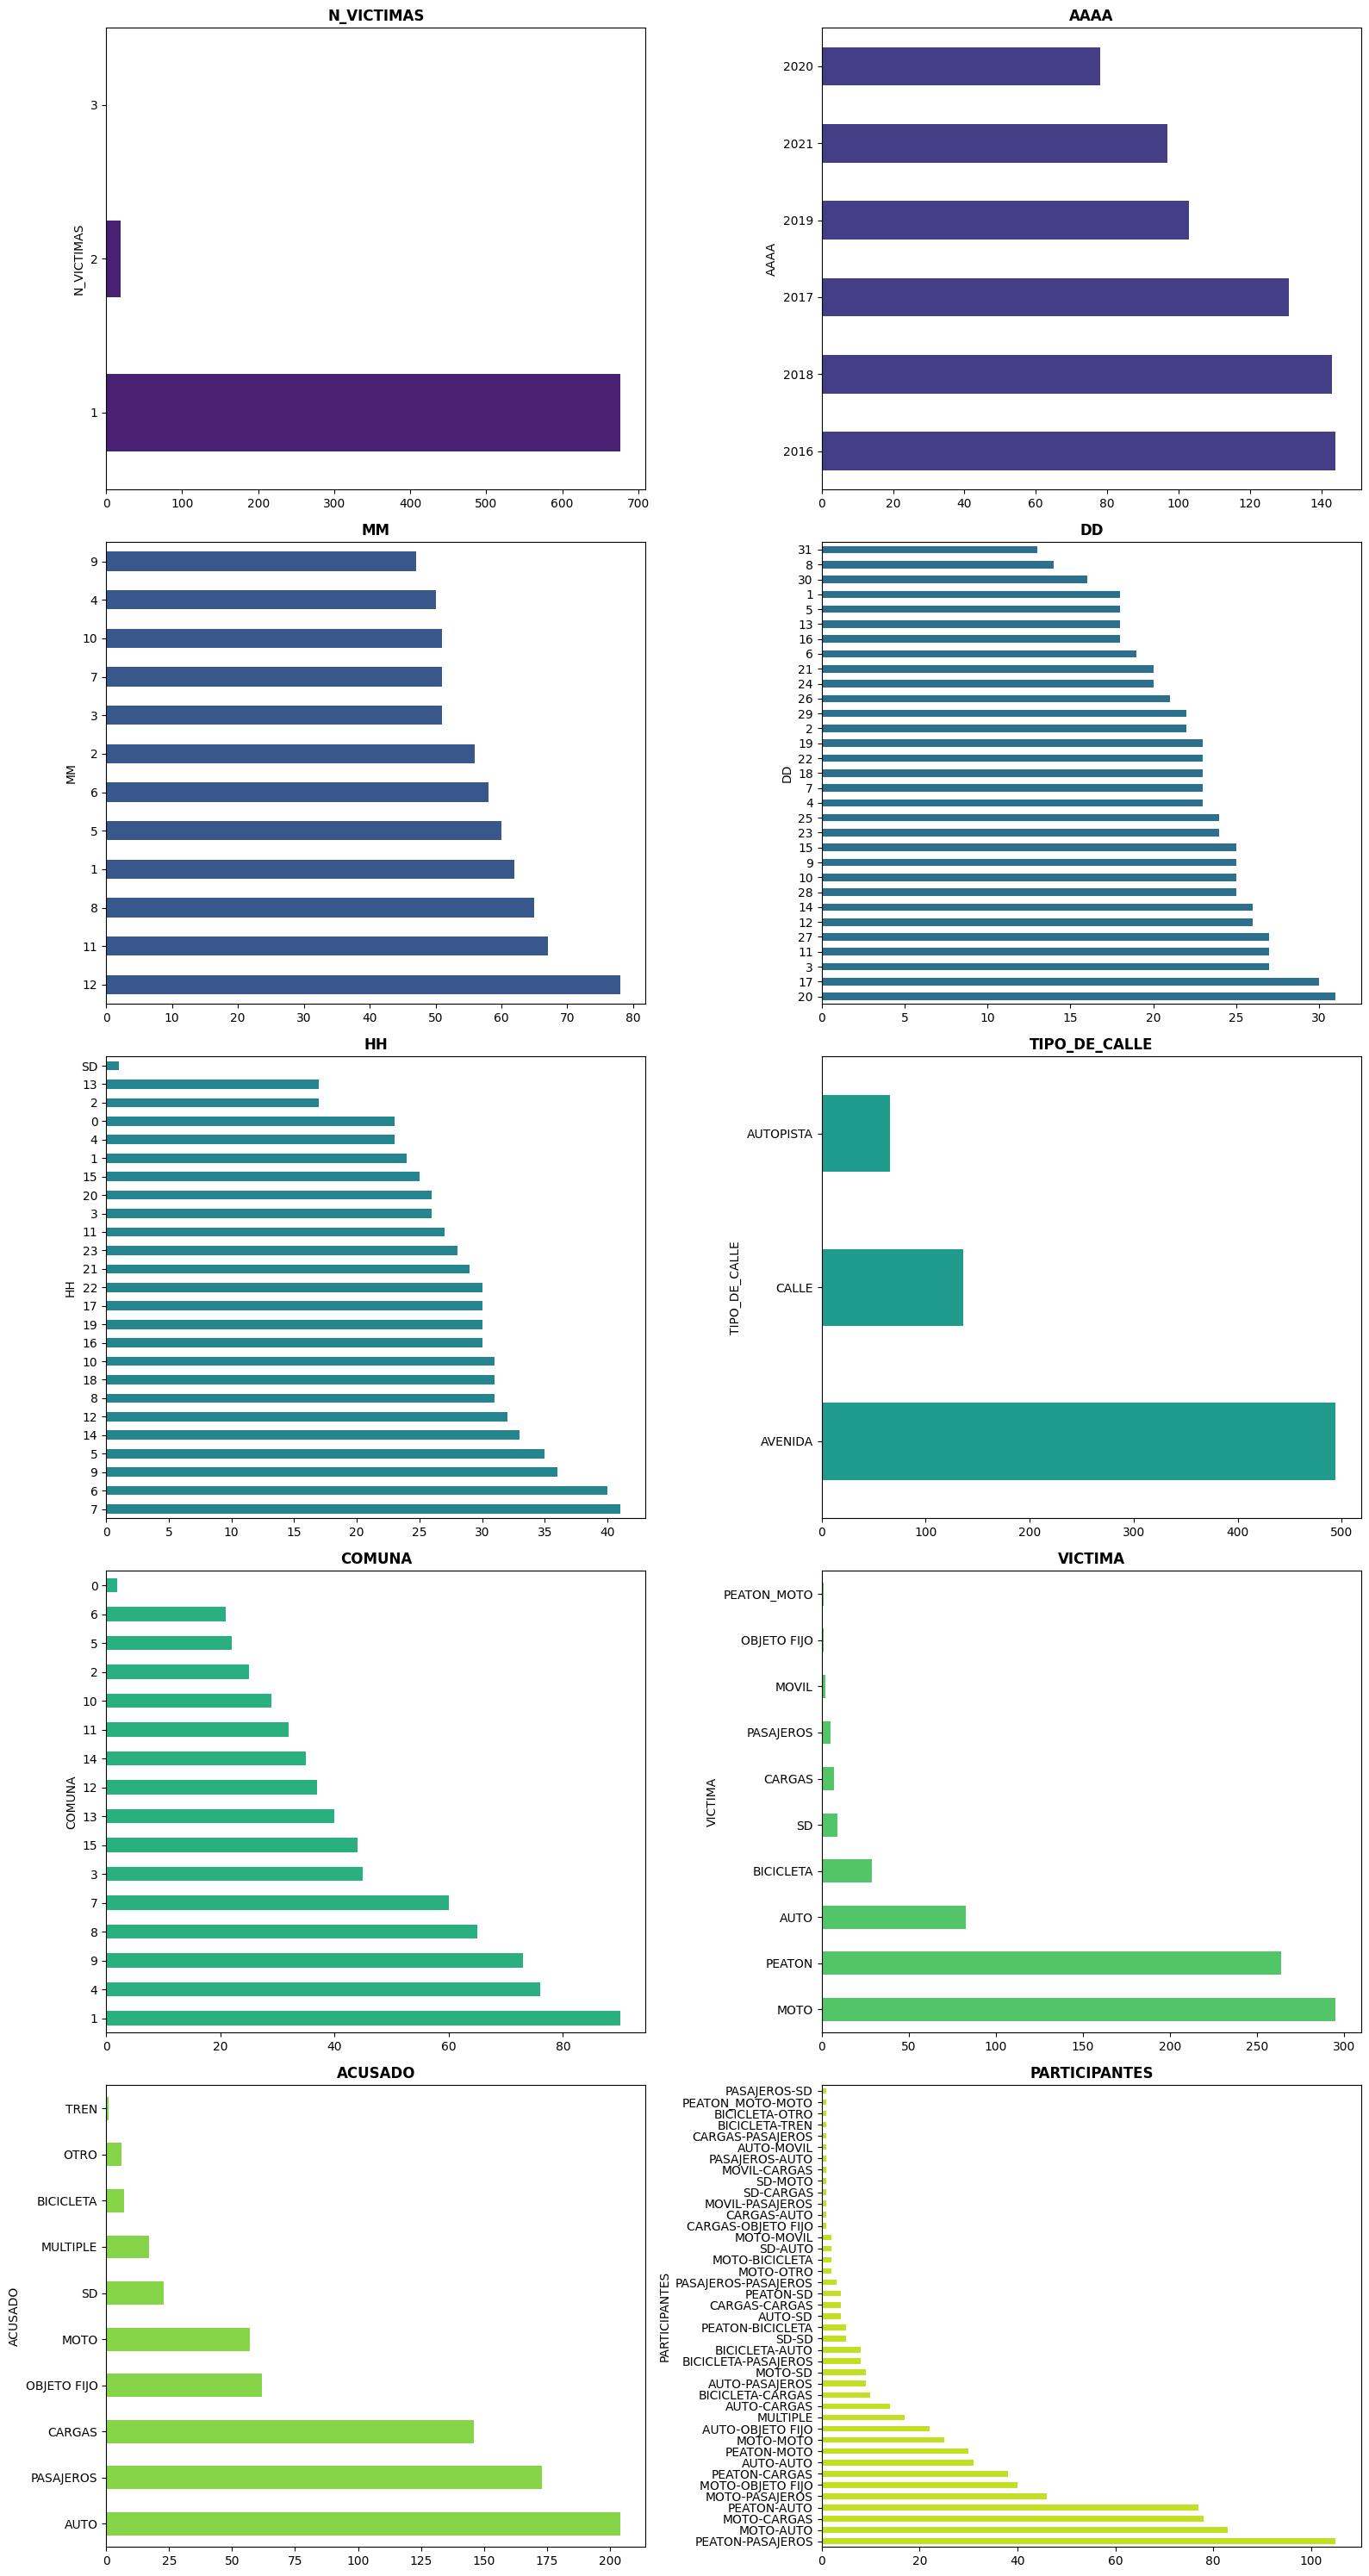

In [61]:
graf_cat(df_homicidios[['N_VICTIMAS', 'AAAA', 'MM', 'DD', 'HH', 'TIPO_DE_CALLE', 'COMUNA', 'VICTIMA', 'ACUSADO', 'PARTICIPANTES']])

### 1. Gráfico de Número de Víctimas:
#### Altura de las barras: 
Representa la cantidad de víctimas para cada categoría.
#### Categorías: 
Dependiendo de la categoría en el eje x, podemos inferir cuál es la zona, tipo de vía o factor que contribuye a un mayor número de víctimas.
### 2. Gráficos de Barras Horizontales:
#### Altura de las barras: 
Indica la frecuencia o cantidad de incidentes asociados a cada categoría.
#### Categorías:
##### Comuna: 
Muestra las comunas con mayor cantidad de accidentes.
##### Tipo de Calle: 
Indica los tipos de calles (avenidas, calles, etc.) donde ocurren más accidentes.
##### Acusado: 
Identifica los tipos de vehículos o actores involucrados en los accidentes con mayor frecuencia (ej.: automóviles, motocicletas).
##### Participantes: 
Muestra la cantidad de personas involucradas en los accidentes por diferentes categorías 
### Inferencias Generales 
##### Comunas:
La comuna con mayor accidentalidad es la comuna 6 y la de menor accidentalidad es la comuna 1.
##### Tipos de Vías Peligrosas: 
Las avenidas son la vía más peligrosa, en cuestiones de accidentes de tránsito.
##### Vehículos Involucrados: 
Los autos suelen ser los principales acusados de generar un accidente de tránsito.
##### Perfil de las Víctimas: 
Las principales victimas son los motociclistas.
##### Horario:
El horario de mayor accidentalidad es 7 AM y el de menor accidentalidad es 1 PM.
##### Días de mayor accidentalidad:
Los días de mayor accidentalidad son los 20.
##### Meses y accidentalidad: 
El mes de mayor accidentalidad es diciembre y el de menor accidentalidad es septiembre.
##### Años y accidentalidad:
El año de mayor accidentalidad fue 2016 y el de menor accidentalidad fue 2020, lo que se explica por las restricciones a la movilidad que se impusieron durante la pandemia generada por SARS-COVID-19.
##### Víctimas mortales por accidente:
La mayoría de accidentes tienen sólo una víctima mortal. 

### Ahora se trabaja con el dataset 'victimas'

In [62]:
print('columnas_victimas: ','[' + ', '.join(df_victimas.keys()) + ']') 

columnas_victimas:  [Unnamed: 0, ID_hecho, FECHA, ROL_VICTIMA, SEXO_VICTIMA, EDAD_VICTIMA, FECHA_FALLECIMIENTO]


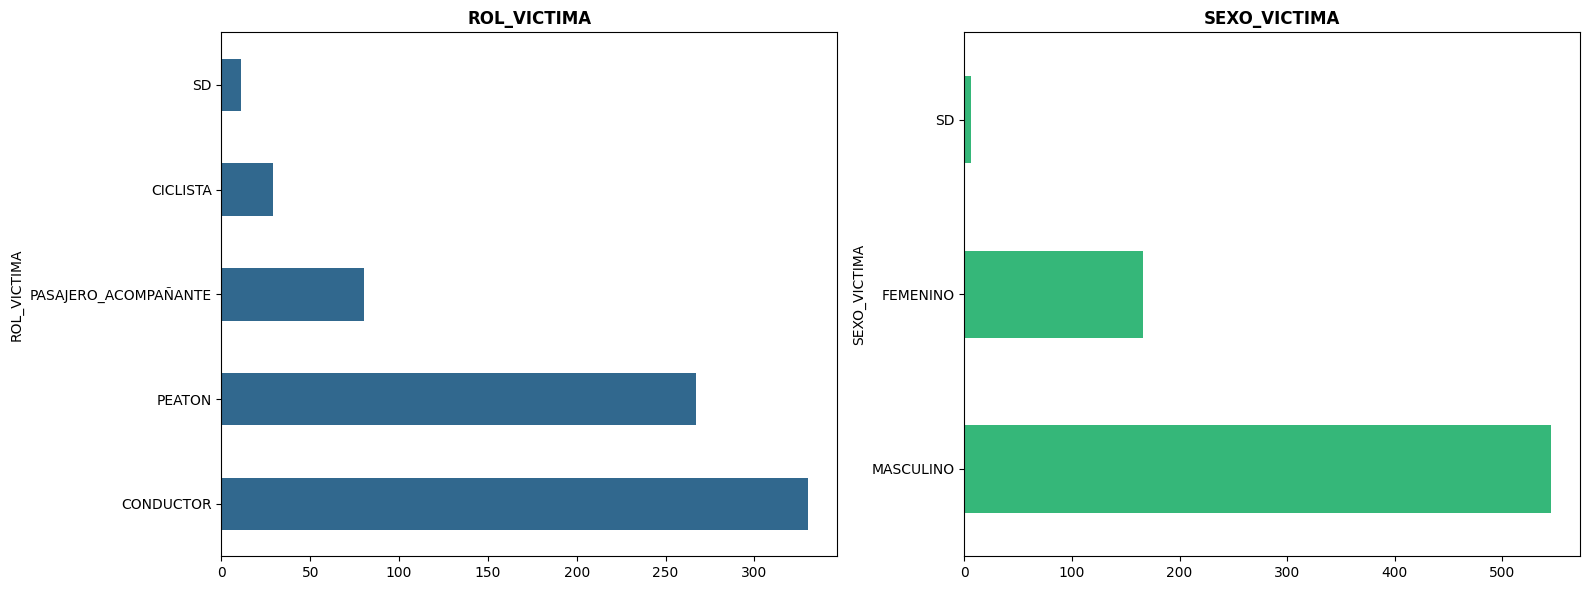

In [63]:
graf_cat(df_victimas[['ROL_VICTIMA', 'SEXO_VICTIMA']])

Es posible inferir que el rol predominante en las víctimas es el de conductor, y el sexo con mayor índice de mortalidad es el masculino.

## Ahora se hace con el top 20 de lugares

In [70]:
top_lugares='lugares.csv'

In [71]:
df_lugares=pd.read_csv(top_lugares, delimiter=',', encoding='UTF-8')
df_lugares.head()

,Unnamed: 0,Dirección,Longitud,Latitud,Cantidad de accidentes
0,0,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",-58.47533969,-34.68757022,1
1,1,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",-58.50877521,-34.66977709,3
2,2,ENTRE RIOS AV. 2034,-58.39040293,-34.63189362,1
3,3,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",-58.46503904,-34.68092974,1
4,4,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",-58.38718297,-34.62246630,1


In [83]:
df10= df_lugares.head(10)

In [85]:
df10

,Unnamed: 0,Dirección,Longitud,Latitud,Cantidad de accidentes
88,88,27 DE FEBRERO AV. y ESCALADA AV.,-58.44451316,-34.68475866,5
5,5,27 DE FEBRERO AV. y ESCALADA AV.,-58.44451316,-34.68475866,5
110,110,27 DE FEBRERO AV. y ESCALADA AV.,-58.44451316,-34.68475866,5
123,123,27 DE FEBRERO AV. y ESCALADA AV.,-58.44451316,-34.68475866,5
585,585,27 DE FEBRERO AV. y ESCALADA AV.,-58.44451316,-34.68475866,5
147,147,"PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV.",-58.50073810,-34.54979510,4
630,630,"PAZ, GRAL. AV. y DEL LIBERTADOR AV.",-58.46743471,-34.53476874,4
67,67,"PAZ, GRAL. AV. y DEL LIBERTADOR AV.",-58.46743471,-34.53476874,4
601,601,"PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV.",-58.50073810,-34.54979510,4
356,356,"PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV.",-58.50073810,-34.54979510,4


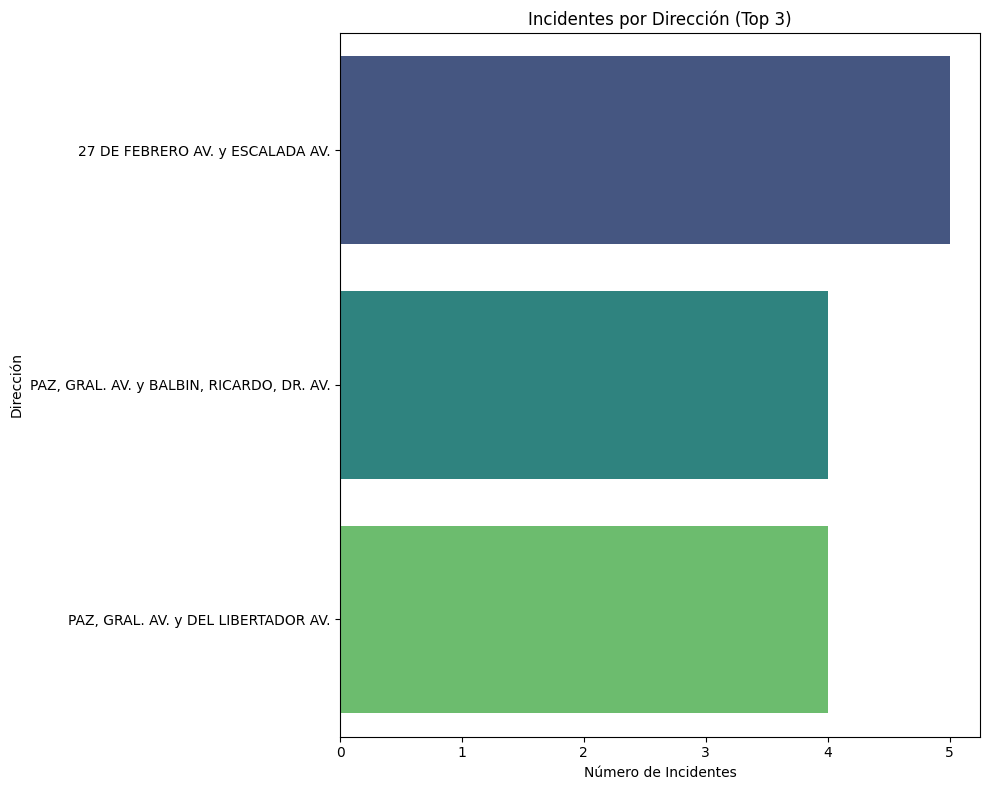

In [86]:
plt.figure(figsize=(10, 8))
sns.barplot(y='Dirección', x='Cantidad de accidentes', data=df10, palette='viridis')
plt.xlabel('Número de Incidentes')
plt.ylabel('Dirección')
plt.title('Incidentes por Dirección (Top 3)')
plt.tight_layout()
plt.show()

El gráfico de barras muestra la distribución de incidentes en distintas vías de la ciudad. Cada barra representa una calle o avenida específica, y su altura indica la frecuencia con la que ocurren incidentes en esa ubicación. Se evidencia que '27 DE FEBRERO AV. y ESCALADA AV' es la dirección con mayor accidentalidad, ya que allí han ocurrido cinco accidentes.

## Análisis individual de las variables

### Analisis de muertes por año

In [87]:
df_pivote=pd.pivot_table(df_homicidios, index= 'AAAA', columns= 'ACUSADO', values='N_VICTIMAS',aggfunc='sum')
df_pivote=df_pivote.drop('SD', axis=1)
df_pivote=df_pivote.replace(np.nan,0)
df_pivote

ACUSADO,AUTO,BICICLETA,CARGAS,MOTO,MULTIPLE,OBJETO FIJO,OTRO,PASAJEROS,TREN
AAAA,,,,,,,,,
2016,39.0,1.0,25.0,14.0,2.0,9.0,1.0,42.0,0.0
2017,40.0,1.0,29.0,7.0,4.0,21.0,0.0,34.0,0.0
2018,39.0,1.0,38.0,16.0,4.0,0.0,2.0,47.0,0.0
2019,34.0,2.0,21.0,8.0,4.0,7.0,2.0,22.0,1.0
2020,27.0,0.0,14.0,10.0,1.0,10.0,0.0,19.0,0.0
2021,31.0,2.0,23.0,3.0,2.0,20.0,1.0,14.0,0.0


In [88]:
muertesaño=df_homicidios['AAAA'].value_counts().reset_index()
muertesaño.columns= ['AAAA', 'accidentes']
total_siniestros = muertesaño['accidentes'].sum()
fila_total = pd.DataFrame({'Año': ['Total'], 'accidentes': [total_siniestros]})
muertesaño = pd.concat([muertesaño, fila_total], ignore_index=True)
print(muertesaño)

     AAAA  accidentes    Año
0  2016.0         144    NaN
1  2018.0         143    NaN
2  2017.0         131    NaN
3  2019.0         103    NaN
4  2021.0          97    NaN
5  2020.0          78    NaN
6     NaN         696  Total


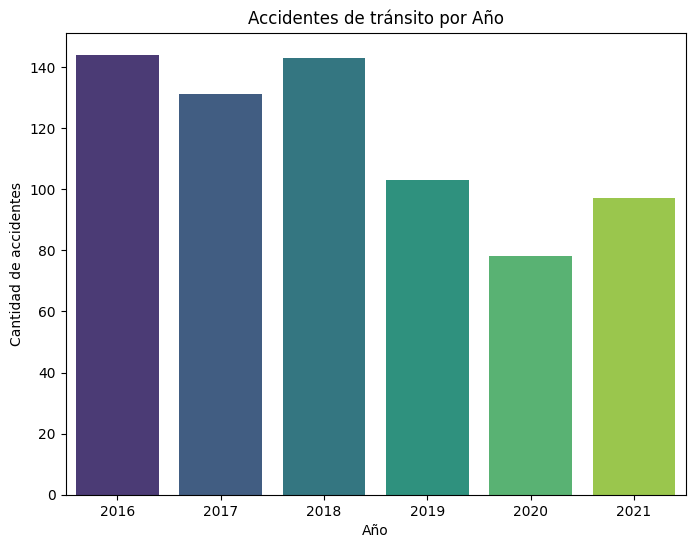

In [90]:
graf1 = df_homicidios['AAAA'].value_counts().reset_index()
graf1.columns = ['AAAA', 'Cantidad']
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='AAAA', y='Cantidad', data=graf1, palette='viridis')
plt.title('Accidentes de tránsito por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=0)
plt.show()

### Analisis de siniestros por mes

In [91]:
df_pivote=pd.pivot_table(df_homicidios,index='ACUSADO', columns= 'MM', values= 'N_VICTIMAS', aggfunc='sum')
df_pivote=df_pivote.drop('SD', axis=0)
df_pivote=df_pivote.replace(np.nan,0)
df_pivote

MM,1,2,3,4,5,6,7,8,9,10,11,12
ACUSADO,,,,,,,,,,,,
AUTO,18.0,23.0,15.0,12.0,18.0,17.0,19.0,19.0,16.0,9.0,16.0,28.0
BICICLETA,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
CARGAS,15.0,9.0,13.0,16.0,10.0,17.0,15.0,14.0,11.0,12.0,10.0,8.0
MOTO,5.0,3.0,4.0,2.0,5.0,4.0,1.0,3.0,3.0,9.0,7.0,12.0
MULTIPLE,5.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0
OBJETO FIJO,6.0,10.0,7.0,5.0,6.0,2.0,4.0,7.0,5.0,6.0,5.0,4.0
OTRO,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0
PASAJEROS,12.0,12.0,13.0,11.0,16.0,12.0,10.0,20.0,11.0,14.0,22.0,25.0
TREN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [92]:
muertesaño=df_homicidios['MM'].value_counts().reset_index()
muertesaño.columns=['MM', 'accidentes']
total_accidentes=muertesaño['accidentes'].sum()
fila_total=pd.DataFrame({'MM': ['Total'], 'accidentes': [total_accidentes]})
muertesaño=pd.concat([muertesaño, fila_total], ignore_index=True)
print(muertesaño)

       MM  accidentes
0      12          78
1      11          67
2       8          65
3       1          62
4       5          60
5       6          58
6       2          56
7       3          51
8       7          51
9      10          51
10      4          50
11      9          47
12  Total         696


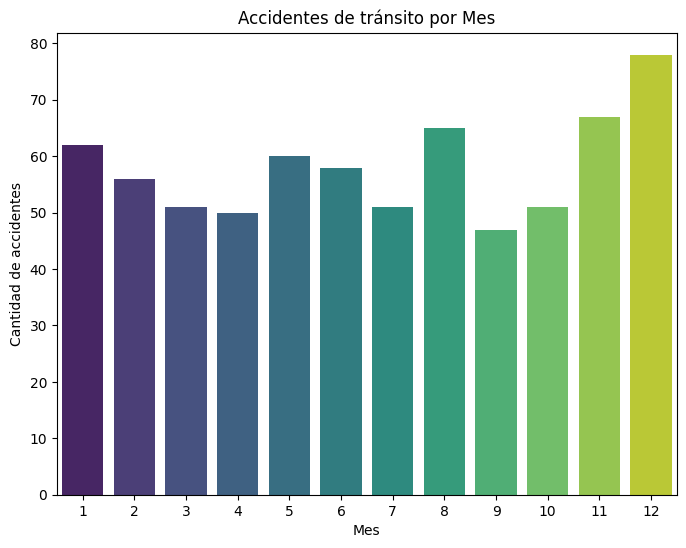

In [93]:
graf2 = df_homicidios['MM'].value_counts().reset_index()
graf2.columns = ['MM', 'Cantidad']
plt.figure(figsize=(8, 6))
sns.barplot(x='MM', y='Cantidad', data=graf2, palette='viridis')
plt.title('Accidentes de tránsito por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=0)
plt.show()

In [94]:
df_homicidios.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
0,0,0,0,0,0,20160001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,MOTO-AUTO,MOTO,AUTO
1,1,1,1,1,1,20160002,1,2016-01-02,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,9,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2,2,2,2,2,20160003,1,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,1,MOTO-AUTO,MOTO,AUTO
3,3,3,3,3,3,20160004,1,2016-01-10,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,MOTO-SD,MOTO,SD
4,4,4,4,4,4,20160005,1,2016-01-21,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,MOTO-PASAJEROS,MOTO,PASAJEROS


### Analisis de siniestros por rango horario.

In [95]:
muerteshorario=df_homicidios['HH'].value_counts().reset_index()
muerteshorario.columns=['Horario', 'accidentes']
total_accidentes = muerteshorario['accidentes'].sum()
fila_total=pd.DataFrame({'Horario': ['Total'], 'accidentes': [total_accidentes]})
muerteshorario=pd.concat([muerteshorario, fila_total], ignore_index=True)
print(muerteshorario)

   Horario  accidentes
0        7          41
1        6          40
2        9          36
3        5          35
4       14          33
5       12          32
6        8          31
7       18          31
8       10          31
9       16          30
10      19          30
11      17          30
12      22          30
13      21          29
14      23          28
15      11          27
16       3          26
17      20          26
18      15          25
19       1          24
20       4          23
21       0          23
22       2          17
23      13          17
24      SD           1
25   Total         696


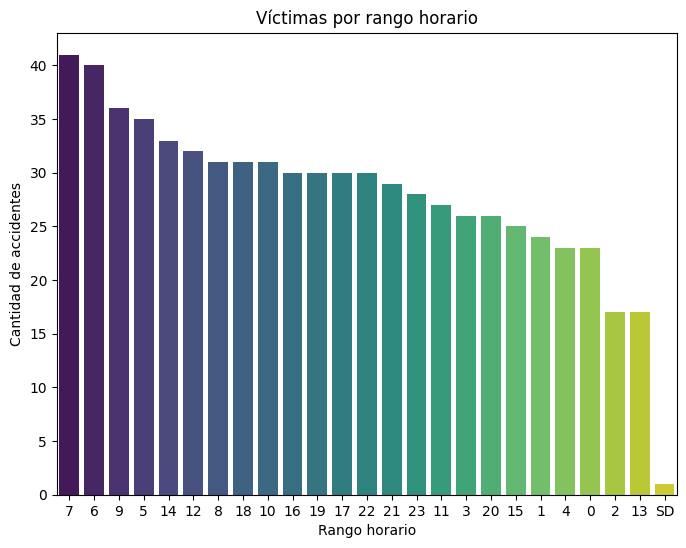

In [96]:
graf3=df_homicidios['HH'].value_counts()
graf3 = df_homicidios['HH'].value_counts().reset_index()
graf3.columns = ['Franja_horaria', 'Cantidad']
plt.figure(figsize=(8, 6))
sns.barplot(x='Franja_horaria', y='Cantidad', data=graf3, palette='viridis')
plt.title('Víctimas por rango horario')
plt.xlabel('Rango horario')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=0);

### Analisis de siniestros por tipo de vehículo

In [97]:
muertestipo=df_homicidios['VICTIMA'].value_counts().reset_index()
muertestipo.columns=['Victima', 'accidentes']
total_accidentes=muertestipo['accidentes'].sum()
fila_total=pd.DataFrame({'Victima': ['Total'], 'accidentes': [total_accidentes]})
muertestipo=pd.concat([muertestipo, fila_total], ignore_index=True)
print(muertestipo)

        Victima  accidentes
0          MOTO         295
1        PEATON         264
2          AUTO          83
3     BICICLETA          29
4            SD           9
5        CARGAS           7
6     PASAJEROS           5
7         MOVIL           2
8   OBJETO FIJO           1
9   PEATON_MOTO           1
10        Total         696


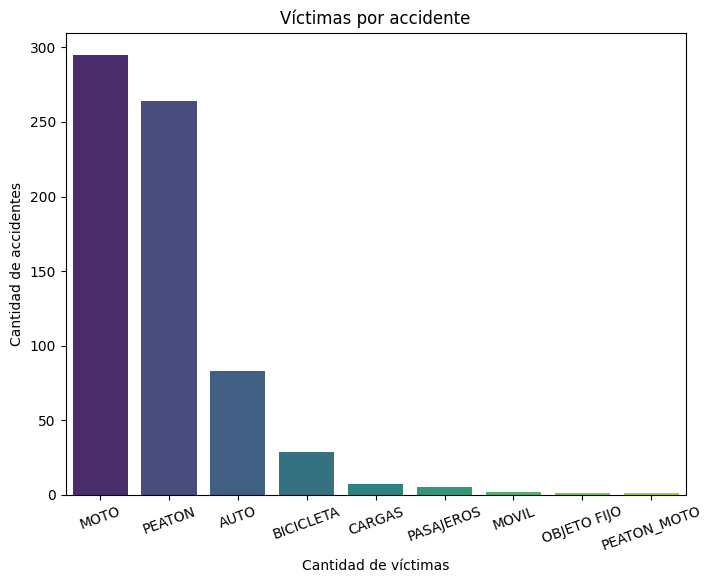

In [98]:
muertestipo=df_homicidios['VICTIMA'].value_counts()
muertestipo=muertestipo.drop('SD', axis=0)
muertestipo=muertestipo.reset_index()
muertestipo.columns= ['Victima', 'Cantidad']
plt.figure(figsize=(8, 6))
sns.barplot(x='Victima', y='Cantidad', data=muertestipo, palette='viridis')
plt.title('Víctimas por accidente')
plt.xlabel('Cantidad de víctimas')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=20)
plt.show()


In [99]:
muertestipo = df_homicidios['VICTIMA'].value_counts().reset_index()
muertestipo.columns = ['Victima', 'accidentes']
muertestipo = muertestipo.drop(muertestipo[muertestipo['Victima'] == 'SD'].index)
total_accidentes = muertestipo['accidentes'].sum()
fila_total = pd.DataFrame({'Victima': ['Total'], 'accidentes': [total_accidentes]})
muertestipo['Porcentaje'] = (muertestipo['accidentes'] / total_accidentes * 100).round(2)
muertestipo = pd.concat([muertestipo, fila_total], ignore_index=True)
print(muertestipo)

       Victima  accidentes  Porcentaje
0         MOTO         295       42.94
1       PEATON         264       38.43
2         AUTO          83       12.08
3    BICICLETA          29        4.22
4       CARGAS           7        1.02
5    PASAJEROS           5        0.73
6        MOVIL           2        0.29
7  OBJETO FIJO           1        0.15
8  PEATON_MOTO           1        0.15
9        Total         687         NaN


### Análisis de siniestros por comuna

In [100]:
muertescomuna=df_homicidios['COMUNA'].value_counts().reset_index()
muertescomuna.columns = ['Comuna', 'accidentes']
total_accidentes = muertesaño['accidentes'].sum()
fila_total = pd.DataFrame({'Total': ['Total'], 'accidentes': [total_accidentes]})
muertescomuna=pd.concat([muertescomuna, fila_total], ignore_index=True)
print(muertescomuna)

    Comuna  accidentes  Total
0      1.0          90    NaN
1      4.0          76    NaN
2      9.0          73    NaN
3      8.0          65    NaN
4      7.0          60    NaN
5      3.0          45    NaN
6     15.0          44    NaN
7     13.0          40    NaN
8     12.0          37    NaN
9     14.0          35    NaN
10    11.0          32    NaN
11    10.0          29    NaN
12     2.0          25    NaN
13     5.0          22    NaN
14     6.0          21    NaN
15     0.0           2    NaN
16     NaN        1392  Total


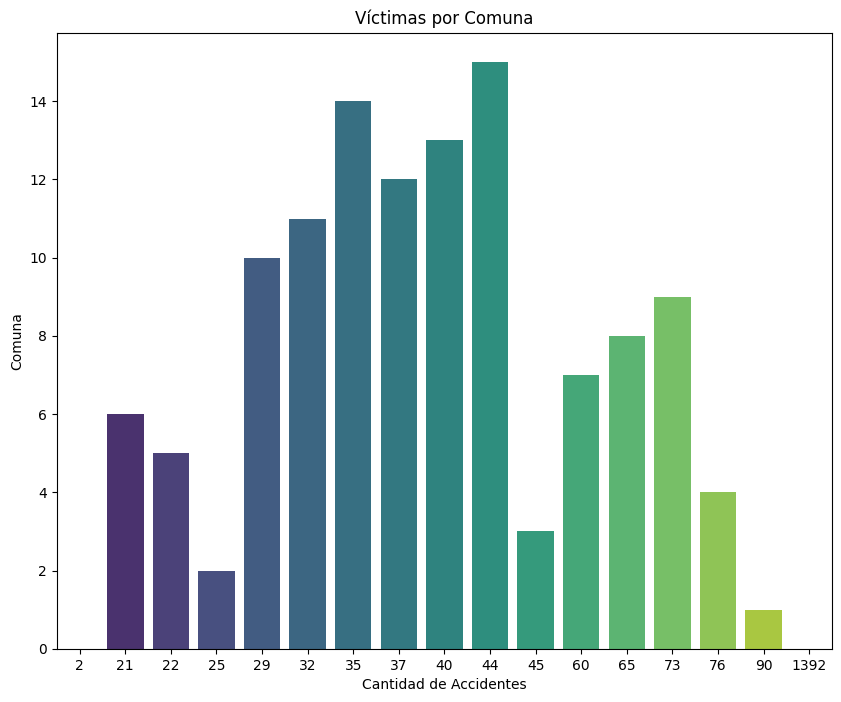

In [101]:
plt.figure(figsize=(10, 8))
sns.barplot(x='accidentes', y='Comuna', data=muertescomuna, palette='viridis')
plt.title('Víctimas por Comuna')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Comuna')
plt.show()

In [102]:
df_homicidios.head(22)

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
0,0,0,0,0,0,20160001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,MOTO-AUTO,MOTO,AUTO
1,1,1,1,1,1,20160002,1,2016-01-02,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,9,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2,2,2,2,2,20160003,1,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,1,MOTO-AUTO,MOTO,AUTO
3,3,3,3,3,3,20160004,1,2016-01-10,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,MOTO-SD,MOTO,SD
4,4,4,4,4,4,20160005,1,2016-01-21,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,MOTO-PASAJEROS,MOTO,PASAJEROS
5,5,5,5,5,5,20160008,1,2016-01-24,2016,1,24,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,8,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
6,6,6,6,6,6,20160009,1,2016-01-24,2016,1,24,19,NOGOYA Y JOAQUIN V. GONZALES,CALLE,11,MOTO-AUTO,MOTO,AUTO
7,7,7,7,7,7,20160010,1,2016-01-29,2016,1,29,15,AV GENERAL PAZ Y AV DE LOS CORRALES,AVENIDA,9,MOTO-AUTO,MOTO,AUTO
8,8,8,8,8,8,20160012,1,2016-02-08,2016,2,8,1,AV BELGRANO Y BERNARDO DE IRIGOYEN,AVENIDA,1,MOTO-CARGAS,MOTO,CARGAS
9,9,9,9,9,9,20160013,1,2016-02-10,2016,2,10,11,AV ENTRE RIOS 1366,AVENIDA,1,PEATON-AUTO,PEATON,AUTO


In [103]:
df_pivote.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, AUTO to TREN
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       9 non-null      float64
 1   2       9 non-null      float64
 2   3       9 non-null      float64
 3   4       9 non-null      float64
 4   5       9 non-null      float64
 5   6       9 non-null      float64
 6   7       9 non-null      float64
 7   8       9 non-null      float64
 8   9       9 non-null      float64
 9   10      9 non-null      float64
 10  11      9 non-null      float64
 11  12      9 non-null      float64
dtypes: float64(12)
memory usage: 936.0+ bytes


In [104]:
df_pivote = pd.pivot_table(df_homicidios, index='COMUNA', columns='HH', values='N_VICTIMAS', aggfunc='sum')
df_pivote = df_pivote.drop(0, axis=0)
df_pivote = df_pivote.replace(np.nan, 0)
df_pivote = df_pivote.loc[:, df_pivote.columns[df_pivote.columns.str.isnumeric()]]
df_pivote.columns = df_pivote.columns.astype(float)
horabancaria1 = df_pivote.loc[:, [10.0, 11.0, 12.0, 13.0, 14.0, 15.0]]
print(horabancaria1)

HH      10.0  11.0  12.0  13.0  14.0  15.0
COMUNA                                    
1        5.0   3.0   3.0   1.0   9.0   2.0
2        1.0   1.0   3.0   1.0   1.0   2.0
3        2.0   1.0   1.0   0.0   2.0   1.0
4        5.0   0.0   2.0   2.0   4.0   2.0
5        0.0   2.0   2.0   2.0   1.0   1.0
6        1.0   0.0   1.0   0.0   1.0   1.0
7        2.0   4.0   2.0   1.0   2.0   2.0
8        5.0   0.0   2.0   3.0   2.0   0.0
9        3.0   4.0   6.0   1.0   4.0   5.0
10       0.0   2.0   3.0   0.0   0.0   2.0
11       1.0   4.0   0.0   1.0   0.0   0.0
12       0.0   2.0   1.0   3.0   0.0   4.0
13       2.0   3.0   2.0   2.0   3.0   1.0
14       0.0   2.0   1.0   0.0   0.0   1.0
15       4.0   1.0   3.0   0.0   4.0   1.0


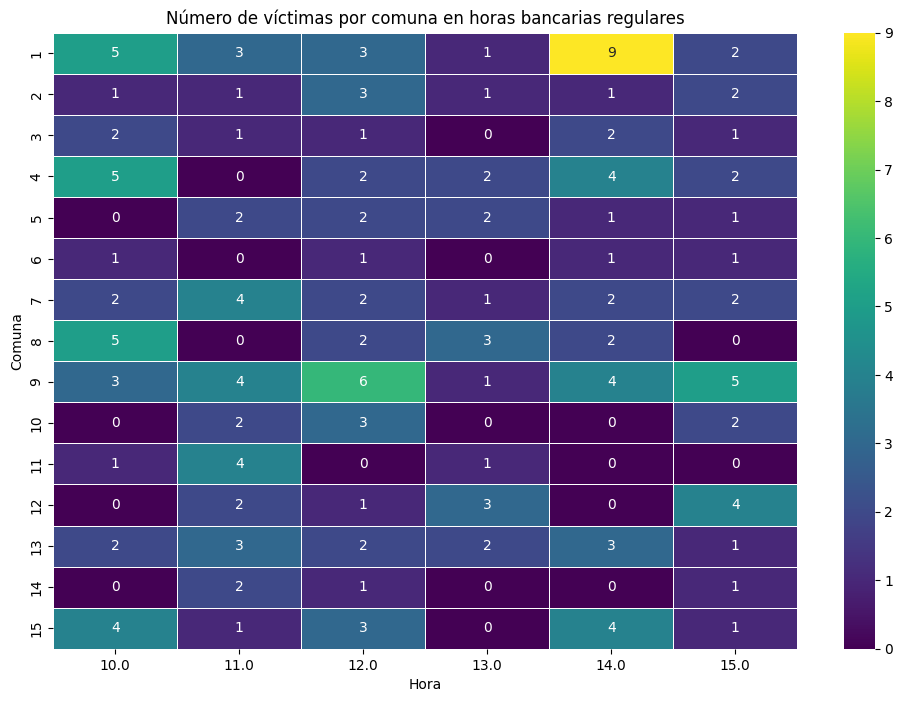

In [105]:
plt.figure(figsize=(12, 8))
sns.heatmap(horabancaria1, annot=True, cmap='viridis', cbar=True, linewidths=.5)
plt.title('Número de víctimas por comuna en horas bancarias regulares')
plt.xlabel('Hora')
plt.ylabel('Comuna');

In [106]:
df_pivote = pd.pivot_table(df_homicidios, index='COMUNA', columns='HH', values='N_VICTIMAS', aggfunc='sum')
df_pivote = df_pivote.drop(0, axis=0)
df_pivote = df_pivote.replace(np.nan, 0)
df_pivote = df_pivote.loc[:, df_pivote.columns[df_pivote.columns.str.isnumeric()]]
df_pivote.columns = df_pivote.columns.astype(float)
horabancaria2 = df_pivote.loc[:, [8.0, 9.0, 10.0, 11.0, 12.0, 13.0]]
print(horabancaria2)

HH      8.0   9.0   10.0  11.0  12.0  13.0
COMUNA                                    
1        2.0   4.0   5.0   3.0   3.0   1.0
2        2.0   0.0   1.0   1.0   3.0   1.0
3        0.0   2.0   2.0   1.0   1.0   0.0
4        5.0   4.0   5.0   0.0   2.0   2.0
5        1.0   1.0   0.0   2.0   2.0   2.0
6        1.0   1.0   1.0   0.0   1.0   0.0
7        1.0   6.0   2.0   4.0   2.0   1.0
8        3.0   2.0   5.0   0.0   2.0   3.0
9        6.0   3.0   3.0   4.0   6.0   1.0
10       1.0   2.0   0.0   2.0   3.0   0.0
11       0.0   1.0   1.0   4.0   0.0   1.0
12       4.0   3.0   0.0   2.0   1.0   3.0
13       0.0   5.0   2.0   3.0   2.0   2.0
14       4.0   1.0   0.0   2.0   1.0   0.0
15       1.0   2.0   4.0   1.0   3.0   0.0


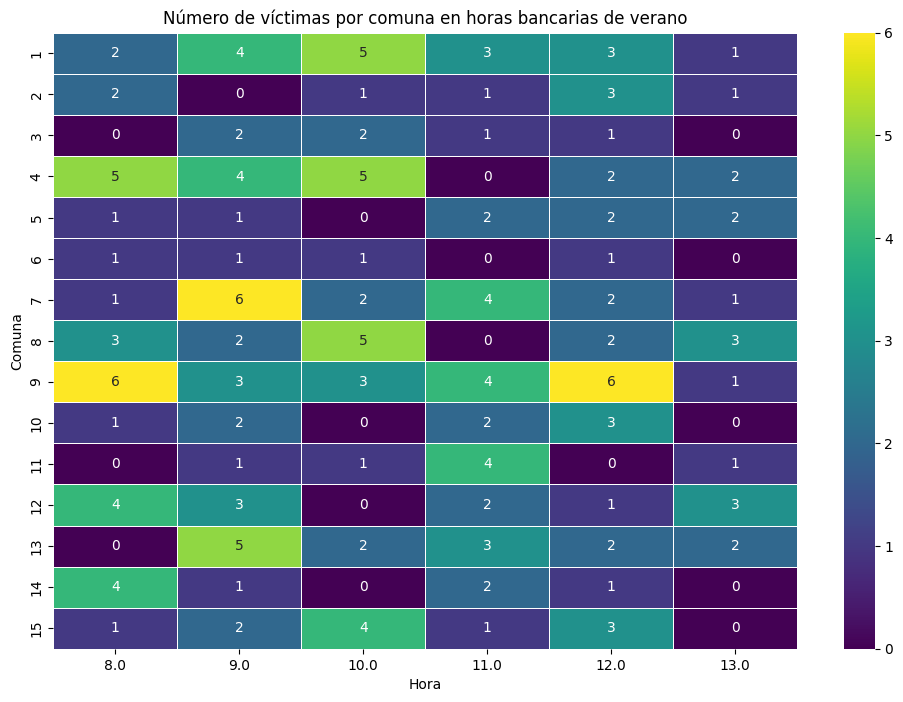

In [107]:
plt.figure(figsize=(12, 8))
sns.heatmap(horabancaria2, annot=True, cmap='viridis', cbar=True, linewidths=.5)
plt.title('Número de víctimas por comuna en horas bancarias de verano')
plt.xlabel('Hora')
plt.ylabel('Comuna');

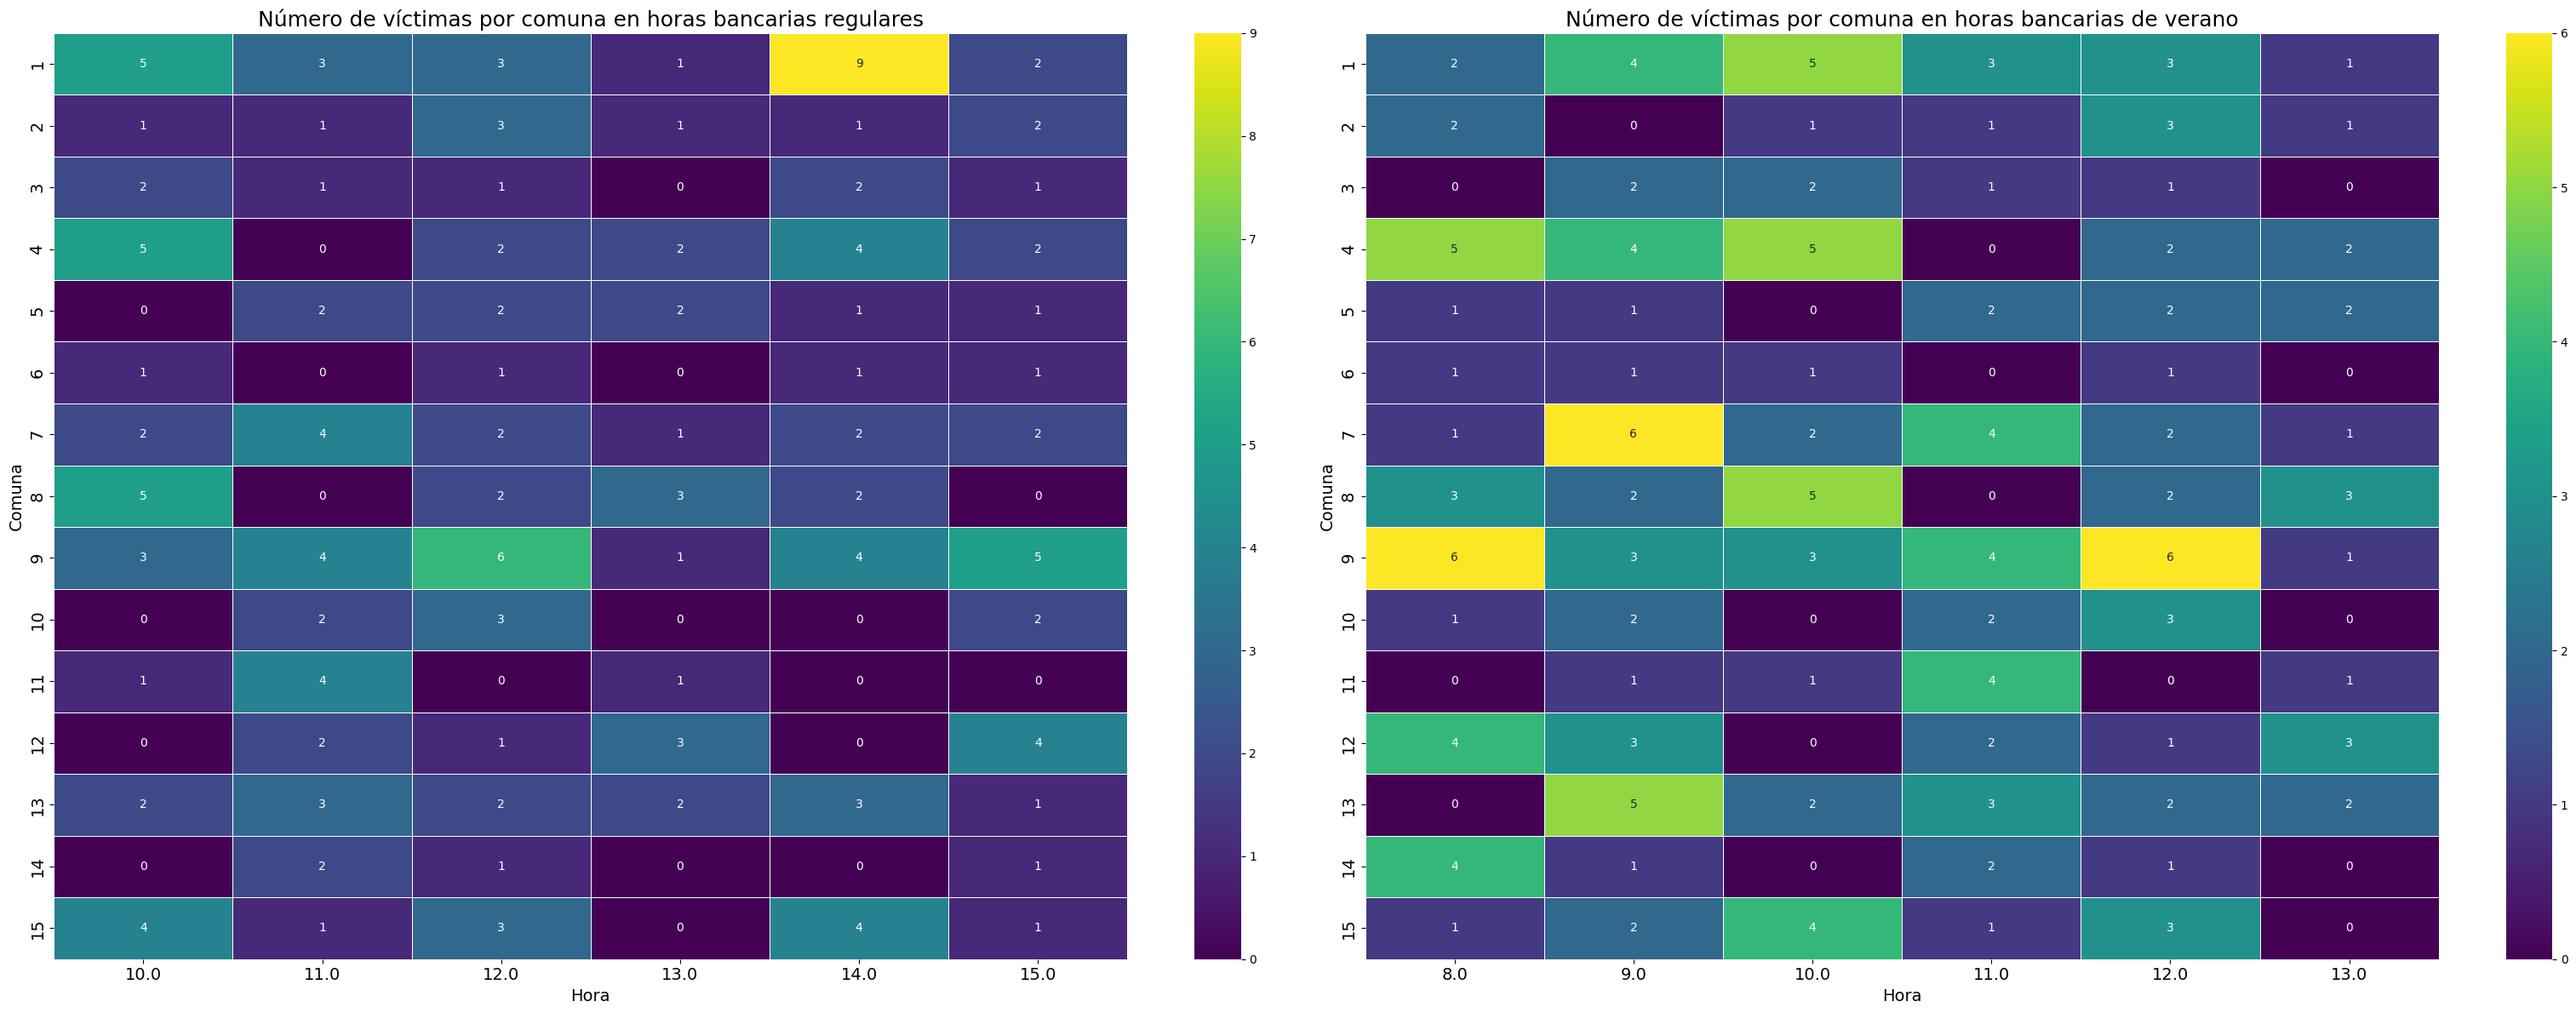

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(32, 12))
sns.heatmap(horabancaria1, annot=True, cmap='viridis', cbar=True, linewidths=.5, ax=axes[0])
axes[0].set_title('Número de víctimas por comuna en horas bancarias regulares', fontsize=18)
axes[0].set_xlabel('Hora', fontsize=14)
axes[0].set_ylabel('Comuna', fontsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
sns.heatmap(horabancaria2, annot=True, cmap='viridis', cbar=True, linewidths=.5, ax=axes[1])
axes[1].set_title('Número de víctimas por comuna en horas bancarias de verano', fontsize=18)
axes[1].set_xlabel('Hora', fontsize=14)
axes[1].set_ylabel('Comuna', fontsize=14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
plt.tight_layout()
plt.show()

In [109]:
df_pivote = pd.pivot_table(df_homicidios, index='COMUNA', columns='HH', values='N_VICTIMAS', aggfunc='sum')
df_pivote = df_pivote.drop(0, axis=0)
df_pivote = df_pivote.replace(np.nan, 0)
df_pivote = df_pivote.loc[:, df_pivote.columns[df_pivote.columns.str.isnumeric()]]
df_pivote.columns = df_pivote.columns.astype(float)
horagodin = df_pivote.loc[:, [8.0, 9.0, 10.0, 11.0, 12.0, 13.0,14.0,15.0,16.0]]
print(horagodin)

HH      8.0   9.0   10.0  11.0  12.0  13.0  14.0  15.0  16.0
COMUNA                                                      
1        2.0   4.0   5.0   3.0   3.0   1.0   9.0   2.0   4.0
2        2.0   0.0   1.0   1.0   3.0   1.0   1.0   2.0   1.0
3        0.0   2.0   2.0   1.0   1.0   0.0   2.0   1.0   4.0
4        5.0   4.0   5.0   0.0   2.0   2.0   4.0   2.0   4.0
5        1.0   1.0   0.0   2.0   2.0   2.0   1.0   1.0   0.0
6        1.0   1.0   1.0   0.0   1.0   0.0   1.0   1.0   1.0
7        1.0   6.0   2.0   4.0   2.0   1.0   2.0   2.0   2.0
8        3.0   2.0   5.0   0.0   2.0   3.0   2.0   0.0   1.0
9        6.0   3.0   3.0   4.0   6.0   1.0   4.0   5.0   2.0
10       1.0   2.0   0.0   2.0   3.0   0.0   0.0   2.0   5.0
11       0.0   1.0   1.0   4.0   0.0   1.0   0.0   0.0   1.0
12       4.0   3.0   0.0   2.0   1.0   3.0   0.0   4.0   2.0
13       0.0   5.0   2.0   3.0   2.0   2.0   3.0   1.0   1.0
14       4.0   1.0   0.0   2.0   1.0   0.0   0.0   1.0   0.0
15       1.0   2.0   4.0

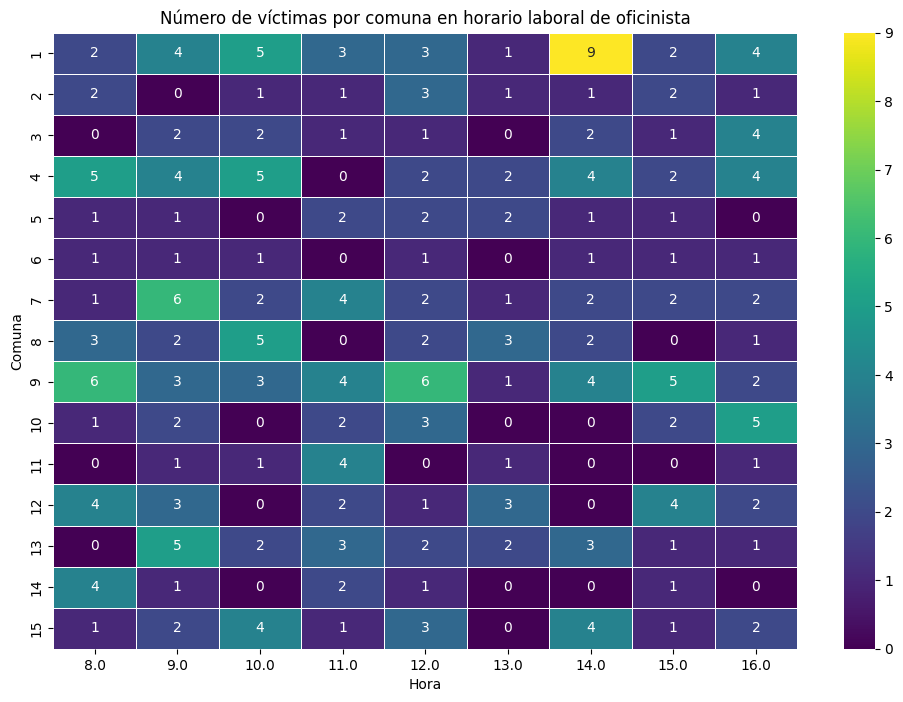

In [110]:
plt.figure(figsize=(12, 8))
sns.heatmap(horagodin, annot=True, cmap='viridis', cbar=True, linewidths=.5)
plt.title('Número de víctimas por comuna en horario laboral de oficinista')
plt.xlabel('Hora')
plt.ylabel('Comuna');

In [111]:
df_pivote = pd.pivot_table(df_homicidios, index='COMUNA', columns='HH', values='N_VICTIMAS', aggfunc='sum')
df_pivote = df_pivote.drop(0, axis=0)
df_pivote = df_pivote.replace(np.nan, 0)
df_pivote = df_pivote.loc[:, df_pivote.columns[df_pivote.columns.str.isnumeric()]]
df_pivote.columns = df_pivote.columns.astype(float)
horatransportgodin = df_pivote.loc[:, [6.0,7.0,8.0,16.0,17.0]]
print(horatransportgodin)

HH      6.0   7.0   8.0   16.0  17.0
COMUNA                              
1        4.0   3.0   2.0   4.0   7.0
2        1.0   2.0   2.0   1.0   0.0
3        5.0   3.0   0.0   4.0   2.0
4        1.0   4.0   5.0   4.0   3.0
5        1.0   0.0   1.0   0.0   3.0
6        2.0   2.0   1.0   1.0   0.0
7        4.0   2.0   1.0   2.0   5.0
8        6.0   6.0   3.0   1.0   4.0
9        2.0   5.0   6.0   2.0   0.0
10       3.0   1.0   1.0   5.0   0.0
11       6.0   5.0   0.0   1.0   1.0
12       1.0   2.0   4.0   2.0   3.0
13       2.0   2.0   0.0   1.0   1.0
14       1.0   6.0   4.0   0.0   1.0
15       3.0   0.0   1.0   2.0   1.0


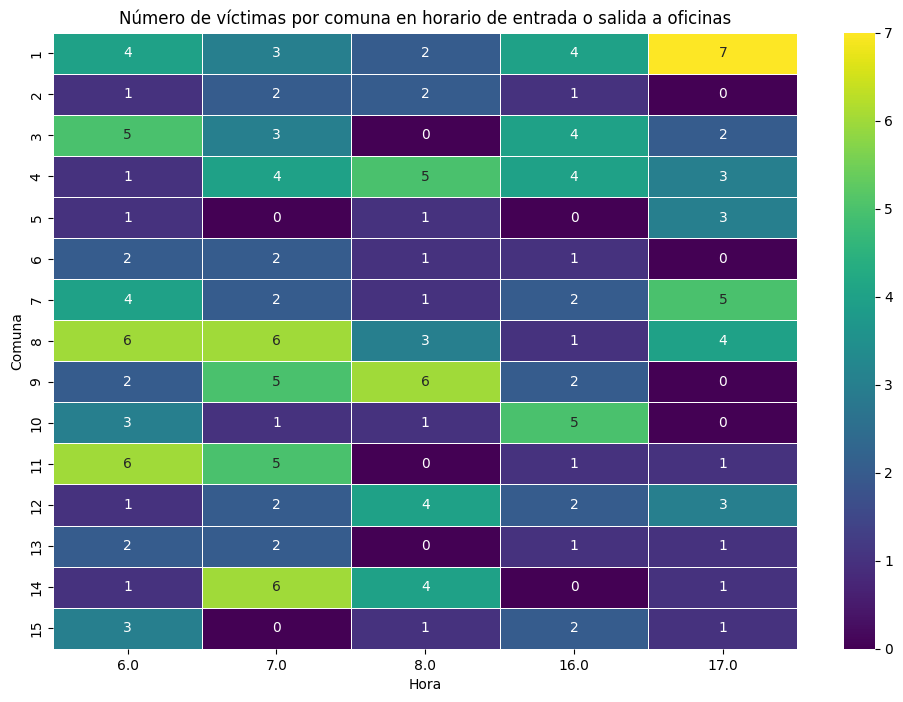

In [112]:
plt.figure(figsize=(12, 8))
sns.heatmap(horatransportgodin, annot=True, cmap='viridis', cbar=True, linewidths=.5)
plt.title('Número de víctimas por comuna en horario de entrada o salida a oficinas')
plt.xlabel('Hora')
plt.ylabel('Comuna');

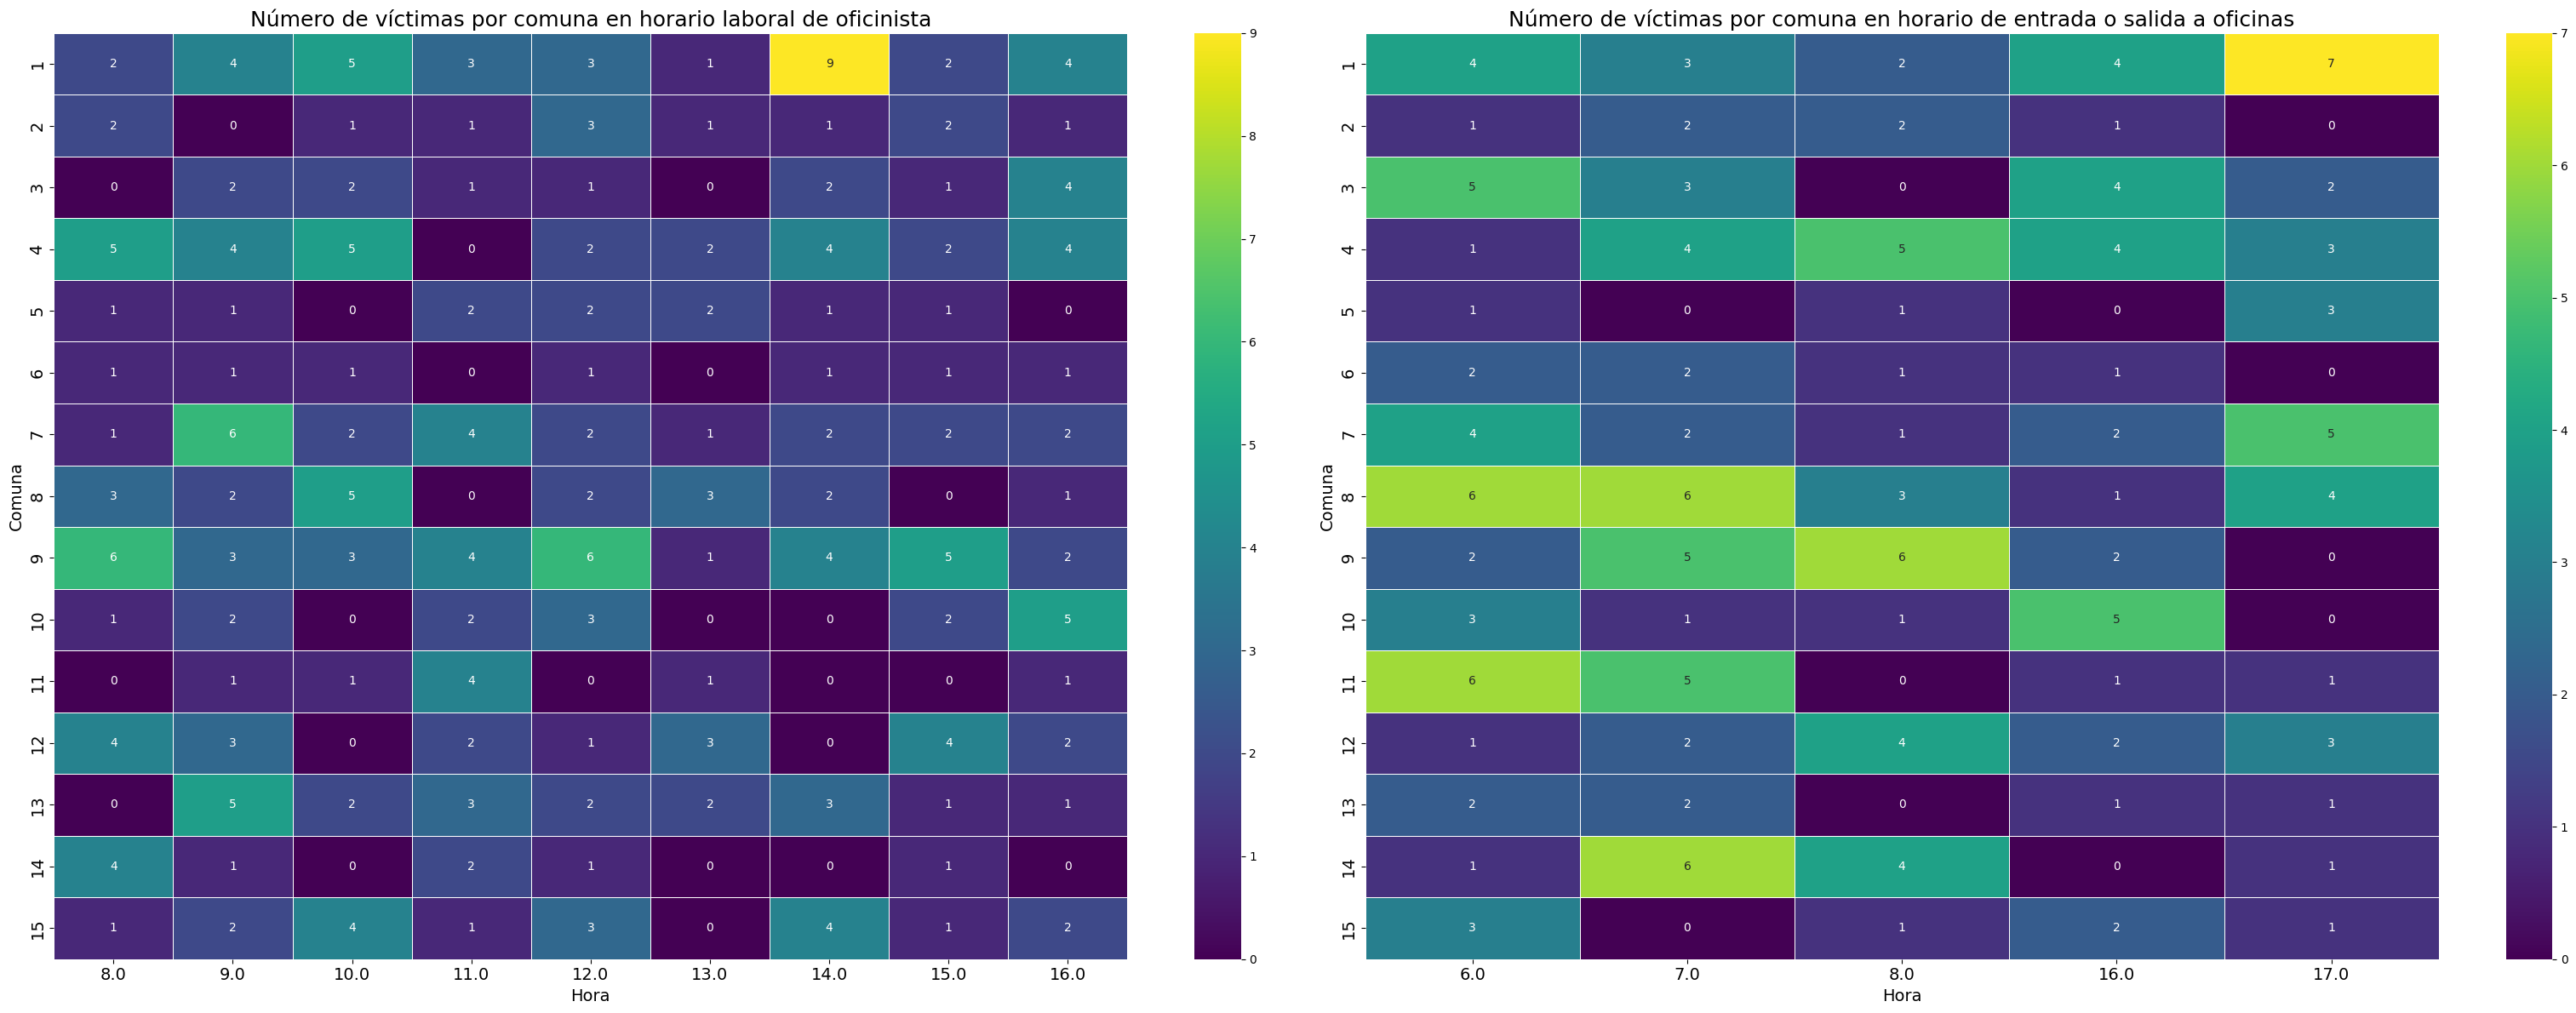

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(32, 12))
sns.heatmap(horagodin, annot=True, cmap='viridis', cbar=True, linewidths=.5, ax=axes[0])
axes[0].set_title('Número de víctimas por comuna en horario laboral de oficinista', fontsize=18)
axes[0].set_xlabel('Hora', fontsize=14)
axes[0].set_ylabel('Comuna', fontsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
sns.heatmap(horatransportgodin, annot=True, cmap='viridis', cbar=True, linewidths=.5, ax=axes[1])
axes[1].set_title('Número de víctimas por comuna en horario de entrada o salida a oficinas', fontsize=18)
axes[1].set_xlabel('Hora', fontsize=14)
axes[1].set_ylabel('Comuna', fontsize=14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
plt.tight_layout()
plt.show()


### Analizamos las muertes por comuna

In [114]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0.4     696 non-null    int64         
 1   Unnamed: 0.3     696 non-null    int64         
 2   Unnamed: 0.2     696 non-null    int64         
 3   Unnamed: 0.1     696 non-null    int64         
 4   Unnamed: 0       696 non-null    int64         
 5   ID               696 non-null    int64         
 6   N_VICTIMAS       696 non-null    int64         
 7   FECHA            696 non-null    datetime64[ns]
 8   AAAA             696 non-null    int64         
 9   MM               696 non-null    int64         
 10  DD               696 non-null    int64         
 11  HH               696 non-null    object        
 12  LUGAR_DEL_HECHO  696 non-null    object        
 13  TIPO_DE_CALLE    696 non-null    object        
 14  COMUNA           696 non-null    int64    

In [115]:
df_pivote=pd.pivot_table(df_homicidios, index='COMUNA', columns='AAAA', values='N_VICTIMAS', aggfunc='sum')
df_pivote=df_pivote.drop(0, axis=0)
df_pivote

AAAA,2016,2017,2018,2019,2020,2021
COMUNA,,,,,,
1,22.0,20.0,20.0,12.0,10.0,9.0
2,1.0,6.0,7.0,2.0,5.0,4.0
3,8.0,6.0,12.0,2.0,10.0,8.0
4,16.0,17.0,17.0,12.0,4.0,13.0
5,3.0,3.0,4.0,5.0,3.0,4.0
6,3.0,7.0,3.0,2.0,2.0,5.0
7,11.0,12.0,16.0,11.0,6.0,6.0
8,20.0,14.0,12.0,7.0,7.0,7.0
9,12.0,17.0,19.0,9.0,7.0,11.0


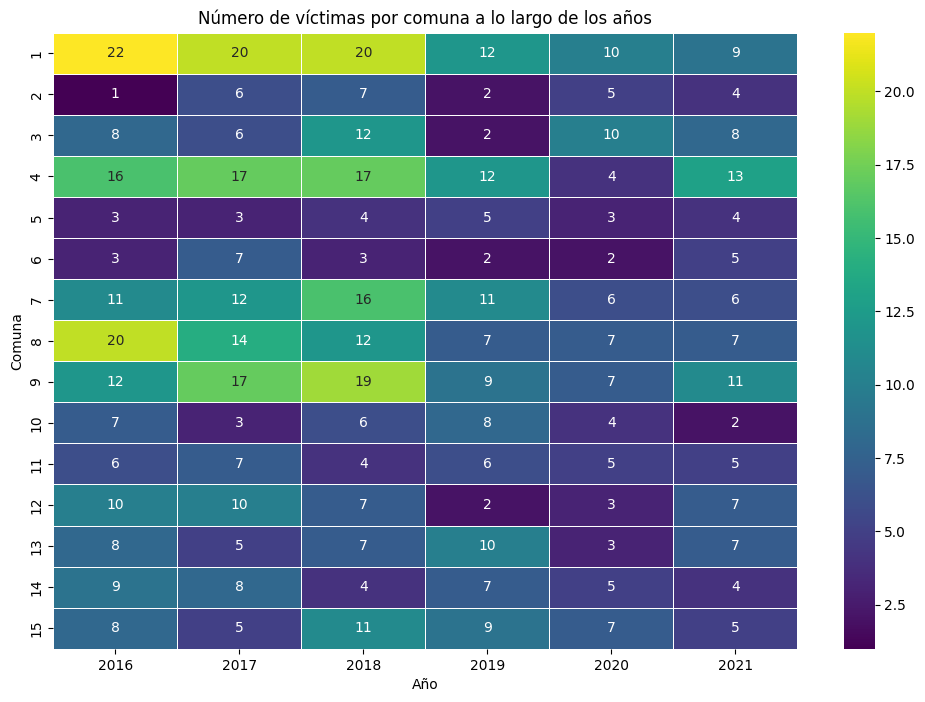

In [116]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivote, annot=True, cmap='viridis', cbar=True, linewidths=.5)
plt.title('Número de víctimas por comuna a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Comuna')
plt.show()

In [146]:
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,DIA DE LA SEMANA
0,20160001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,MOTO-AUTO,MOTO,AUTO,Friday
1,20160002,1,2016-01-02,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,9,AUTO-PASAJEROS,AUTO,PASAJEROS,Saturday
2,20160003,1,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,1,MOTO-AUTO,MOTO,AUTO,Sunday
3,20160004,1,2016-01-10,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,MOTO-SD,MOTO,SD,Sunday
4,20160005,1,2016-01-21,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,MOTO-PASAJEROS,MOTO,PASAJEROS,Thursday


SEMESTRE  Semestre 1  Semestre 2
COMUNA                          
1                3.0         6.0
2                1.0         3.0
3                3.0         5.0
4                9.0         4.0
5                3.0         1.0
6                1.0         4.0
7                3.0         3.0
8                6.0         1.0
9                7.0         4.0
10               1.0         1.0
11               1.0         4.0
12               4.0         3.0
13               5.0         2.0
14               3.0         1.0
15               5.0         0.0


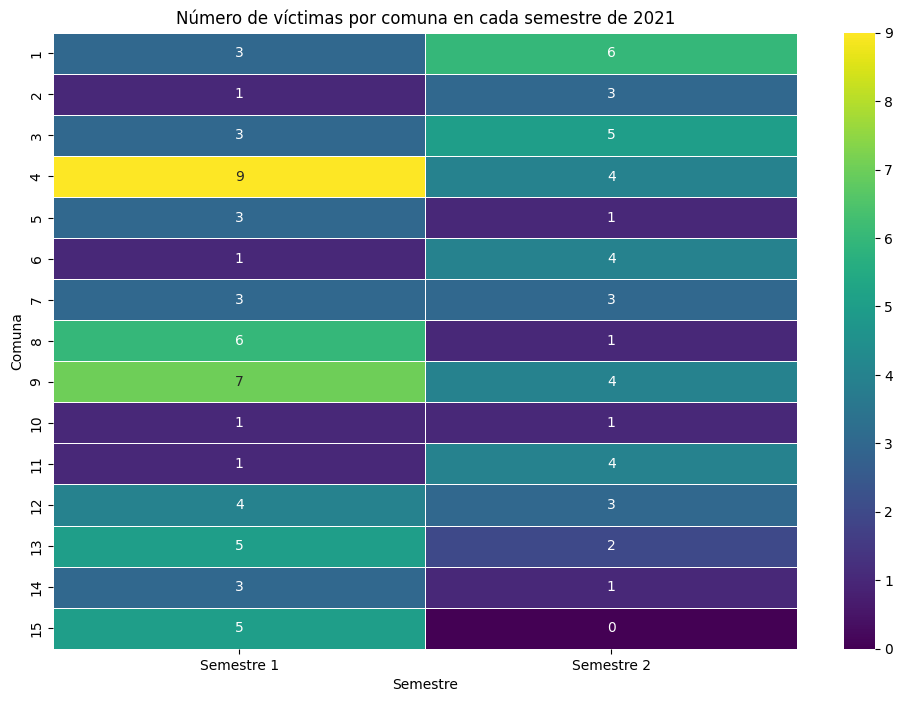

In [118]:
df_2021 = df_homicidios[df_homicidios['AAAA'] == 2021]

# Definir la función para clasificar en semestres
def get_semester(month):
    if month <= 6:
        return 'Semestre 1'
    else:
        return 'Semestre 2'

# Añadir la columna del semestre
df_2021['SEMESTRE'] = df_2021['MM'].apply(get_semester)

# Crear la tabla pivote
df_pivote_semestre = pd.pivot_table(df_2021, index='COMUNA', columns='SEMESTRE', values='N_VICTIMAS', aggfunc='sum')
df_pivote_semestre = df_pivote_semestre.replace(np.nan, 0)

print(df_pivote_semestre)

# Crear el heatmap con Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivote_semestre, annot=True, cmap='viridis', cbar=True, linewidths=.5)
plt.title('Número de víctimas por comuna en cada semestre de 2021')
plt.xlabel('Semestre')
plt.ylabel('Comuna')
plt.show()

In [134]:
df_2021.tail()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,SEMESTRE
691,691,691,691,691,691,20210093,1,2021-12-13,2021,12,13,17,AV. RIESTRA Y MOM,AVENIDA,7,MOTO-AUTO,MOTO,AUTO,Semestre 2
692,692,692,692,692,692,20210094,1,2021-12-20,2021,12,20,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,9,MOTO-AUTO,MOTO,AUTO,Semestre 2
693,693,693,693,693,693,20210095,1,2021-12-30,2021,12,30,0,AV. GAONA Y TERRADA,AVENIDA,11,MOTO-CARGAS,MOTO,CARGAS,Semestre 2
694,694,694,694,694,694,20210096,1,2021-12-15,2021,12,15,10,AV. EVA PERON 4071,AVENIDA,9,AUTO-CARGAS,AUTO,CARGAS,Semestre 2
695,695,695,695,695,695,20210097,1,2021-11-18,2021,11,18,6,PADRE CARLOS MUJICA 709,CALLE,1,BICICLETA-AUTO,BICICLETA,AUTO,Semestre 2


In [120]:
df_2021.to_csv('2021semestres.csv')

SEMESTRE  Semestre 1  Semestre 2
COMUNA                          
1                3.0         6.0
2                1.0         3.0
3                3.0         5.0
4                9.0         4.0
5                3.0         1.0
6                1.0         4.0
7                3.0         3.0
8                6.0         1.0
9                7.0         4.0
10               1.0         1.0
11               1.0         4.0
12               4.0         3.0
13               5.0         2.0
14               3.0         1.0
15               5.0         0.0


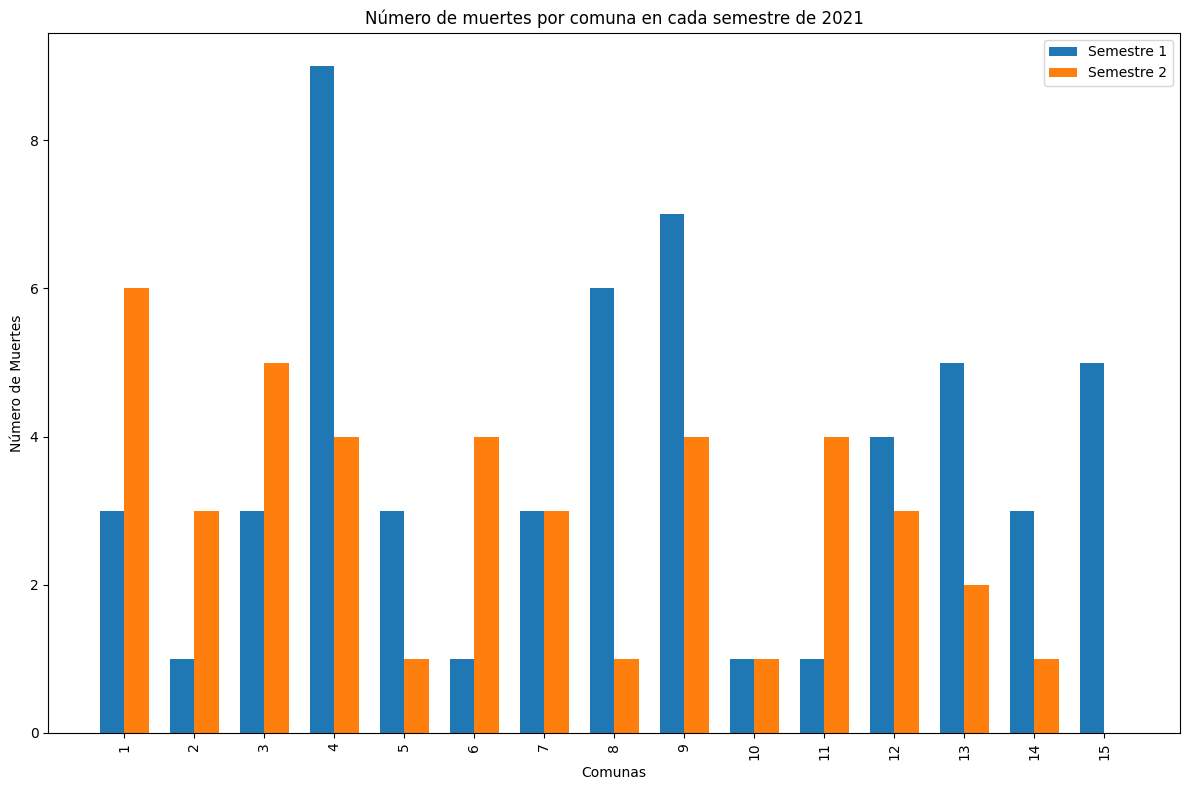

In [145]:
df_pivote_semestre = pd.pivot_table(df_2021, index='COMUNA', columns='SEMESTRE', values='N_VICTIMAS', aggfunc='sum')
df_pivote_semestre = df_pivote_semestre.replace(np.nan, 0)
print(df_pivote_semestre)
plt.figure(figsize=(12, 8))
bar_width = 0.35
bar_positions_1 = np.arange(len(df_pivote_semestre.index))
bar_positions_2 = bar_positions_1 + bar_width
colors = sns.color_palette("viridis", 2)
plt.bar(bar_positions_1, df_pivote_semestre['Semestre 1'], width=bar_width, label='Semestre 1', color=colors[0])
plt.bar(bar_positions_2, df_pivote_semestre['Semestre 2'], width=bar_width, label='Semestre 2', color=colors[1])
plt.xlabel('Comunas')
plt.ylabel('Número de Muertes')
plt.title('Número de muertes por comuna en cada semestre de 2021')
plt.xticks(bar_positions_1 + bar_width / 2, df_pivote_semestre.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

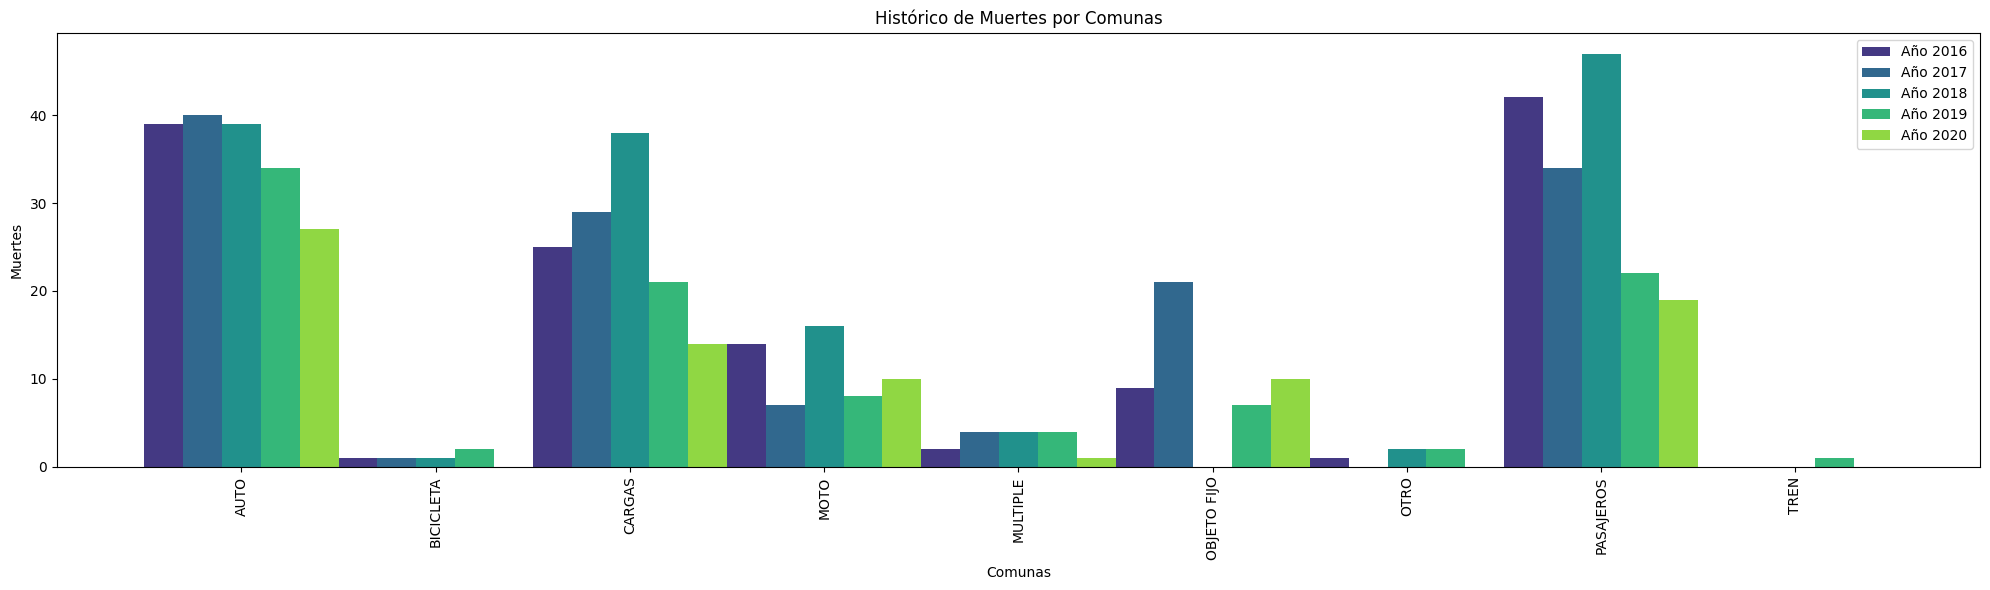

In [171]:
plt.figure(figsize=(20, 6))
bar_width = 0.2
colors = sns.color_palette("viridis", len(range(2016, 2021)))

for i, year in enumerate(range(2016, 2021)):
    bar_positions = np.arange(len(df_pivote.index)) + i * bar_width
    plt.bar(bar_positions, df_pivote[year], width=bar_width, label=f'Año {year}', color=colors[i])

plt.xlabel('Comunas')
plt.ylabel('Muertes')
plt.title('Histórico de Muertes por Comunas')
plt.legend()
plt.xticks(np.arange(len(df_pivote.index)) + bar_width * (len(range(2016, 2021)) / 2 - 0.5), df_pivote.index, rotation=90)
plt.tight_layout()


El análisis del gráfico revela una tendencia general a la baja en el número de muertes por accidentes de tránsito relacionados con automóviles, bicicletas y motocicletas en los últimos años, lo que sugiere la efectividad de las medidas de seguridad vial implementadas. Sin embargo, se observa una estabilidad o ligero aumento en otras categorías como "otros" y "pasajeros", indicando la necesidad de mayores esfuerzos en estos ámbitos. Históricamente, los automóviles han sido los vehículos más involucrados en accidentes mortales, aunque su tendencia es a la baja. Las motocicletas, a pesar de la disminución, siguen representando un porcentaje significativo de las muertes. La categoría "otros", que podría incluir a peatones, muestra una tendencia que requeriría un análisis más detallado. Otros tipos de vehículos, como cargas y trenes, suelen tener menos incidentes, pero sus tendencias individuales son relevantes. A pesar de las fluctuaciones anuales, las tendencias a largo plazo son claras, mostrando una mejora general en la seguridad vial, aunque con áreas que requieren atención específica.

### Accidentes por dia de la semana

In [137]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0.5      696 non-null    int64         
 1   Unnamed: 0.4      696 non-null    int64         
 2   Unnamed: 0.3      696 non-null    int64         
 3   Unnamed: 0.2      696 non-null    int64         
 4   Unnamed: 0.1      696 non-null    int64         
 5   Unnamed: 0        696 non-null    int64         
 6   ID                696 non-null    int64         
 7   N_VICTIMAS        696 non-null    int64         
 8   FECHA             696 non-null    datetime64[ns]
 9   AAAA              696 non-null    int64         
 10  MM                696 non-null    int64         
 11  DD                696 non-null    int64         
 12  HH                696 non-null    object        
 13  LUGAR_DEL_HECHO   696 non-null    object        
 14  TIPO_DE_CALLE     696 non-

In [136]:
df_homicidios['DIA DE LA SEMANA'] = df_homicidios['FECHA'].dt.day_name()

In [141]:
df_homicidios.drop('Unnamed: 0.5', axis=1, inplace=True)
df_homicidios.drop('Unnamed: 0.4', axis=1, inplace=True)
df_homicidios.drop('Unnamed: 0.3', axis=1, inplace=True)
df_homicidios.drop('Unnamed: 0.2', axis=1, inplace=True)
df_homicidios.drop('Unnamed: 0.1', axis=1, inplace=True)
df_homicidios.drop('Unnamed: 0', axis=1, inplace=True)

In [147]:
df_homicidios

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,DIA DE LA SEMANA
0,20160001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,MOTO-AUTO,MOTO,AUTO,Friday
1,20160002,1,2016-01-02,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,9,AUTO-PASAJEROS,AUTO,PASAJEROS,Saturday
2,20160003,1,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,1,MOTO-AUTO,MOTO,AUTO,Sunday
3,20160004,1,2016-01-10,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,MOTO-SD,MOTO,SD,Sunday
4,20160005,1,2016-01-21,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,MOTO-PASAJEROS,MOTO,PASAJEROS,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,20210093,1,2021-12-13,2021,12,13,17,AV. RIESTRA Y MOM,AVENIDA,7,MOTO-AUTO,MOTO,AUTO,Monday
692,20210094,1,2021-12-20,2021,12,20,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,9,MOTO-AUTO,MOTO,AUTO,Monday
693,20210095,1,2021-12-30,2021,12,30,0,AV. GAONA Y TERRADA,AVENIDA,11,MOTO-CARGAS,MOTO,CARGAS,Thursday
694,20210096,1,2021-12-15,2021,12,15,10,AV. EVA PERON 4071,AVENIDA,9,AUTO-CARGAS,AUTO,CARGAS,Wednesday


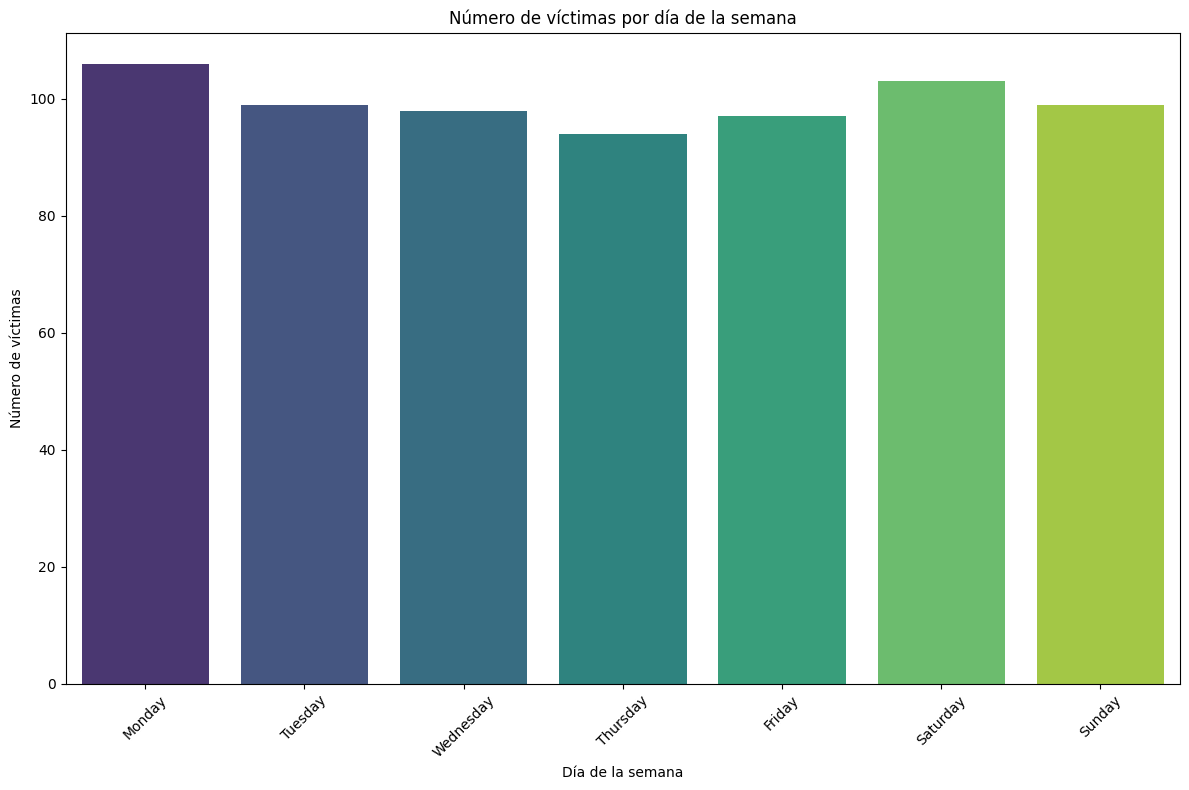

In [149]:
muertes_dia = df_homicidios['DIA DE LA SEMANA'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=muertes_dia.index, y=muertes_dia.values, palette='viridis')
plt.title('Número de víctimas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de víctimas')
plt.xticks(rotation=45)
plt.tight_layout()


Es posible evidenciar que los días de mayor accidentalidad son los lunes y sábados, mientras que los de menor accidentalidad son los jueves y miércoles.

### Analizamos los siniestros por acusado

In [153]:
df_pivote = pd.pivot_table(df_homicidios, index='ACUSADO', columns='AAAA', values='N_VICTIMAS', aggfunc='sum')
df_pivote = df_pivote.drop('SD', axis=0)
df_pivote = df_pivote.replace(np.nan, 0)
df_pivote

AAAA,2016,2017,2018,2019,2020,2021
ACUSADO,,,,,,
AUTO,39.0,40.0,39.0,34.0,27.0,31.0
BICICLETA,1.0,1.0,1.0,2.0,0.0,2.0
CARGAS,25.0,29.0,38.0,21.0,14.0,23.0
MOTO,14.0,7.0,16.0,8.0,10.0,3.0
MULTIPLE,2.0,4.0,4.0,4.0,1.0,2.0
OBJETO FIJO,9.0,21.0,0.0,7.0,10.0,20.0
OTRO,1.0,0.0,2.0,2.0,0.0,1.0
PASAJEROS,42.0,34.0,47.0,22.0,19.0,14.0
TREN,0.0,0.0,0.0,1.0,0.0,0.0


In [157]:
df_homicidios.head(1)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,DIA DE LA SEMANA
0,20160001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,MOTO-AUTO,MOTO,AUTO,Friday


In [160]:
muertes_acusado = df_homicidios['ACUSADO'].value_counts().reset_index()
muertes_acusado.columns = ['Acusado', 'Accidentes']
total_accidentes = muertes_acusado['Accidentes'].sum()
fila_total = pd.DataFrame({'Acusado': ['Total'], 'Accidentes': [total_accidentes]})
muertes_acusado = pd.concat([muertes_acusado, fila_total], ignore_index=True)
muertes_acusado['Porcentaje'] = (muertes_acusado['Accidentes'] / total_accidentes * 100).round(2)
print(muertes_acusado)


        Acusado  Accidentes  Porcentaje
0          AUTO         204       29.31
1     PASAJEROS         173       24.86
2        CARGAS         146       20.98
3   OBJETO FIJO          62        8.91
4          MOTO          57        8.19
5            SD          23        3.30
6      MULTIPLE          17        2.44
7     BICICLETA           7        1.01
8          OTRO           6        0.86
9          TREN           1        0.14
10        Total         696      100.00


In [162]:
muertes_acusado = df_homicidios['ACUSADO'].value_counts().reset_index()
muertes_acusado.columns = ['ACUSADO', 'Siniestros']
total_siniestros = muertes_acusado['Siniestros'].sum()
fila_total = pd.DataFrame({'ACUSADO': ['Total'], 'Siniestros': [total_siniestros]})
muertes_acusado = pd.concat([muertes_acusado, fila_total], ignore_index=True)
muertes_acusado['Porcentaje'] = (muertes_acusado['Siniestros'] / df_homicidios['N_VICTIMAS'].sum() * 100).round(2)
print(muertes_acusado)


        ACUSADO  Siniestros  Porcentaje
0          AUTO         204       28.45
1     PASAJEROS         173       24.13
2        CARGAS         146       20.36
3   OBJETO FIJO          62        8.65
4          MOTO          57        7.95
5            SD          23        3.21
6      MULTIPLE          17        2.37
7     BICICLETA           7        0.98
8          OTRO           6        0.84
9          TREN           1        0.14
10        Total         696       97.07


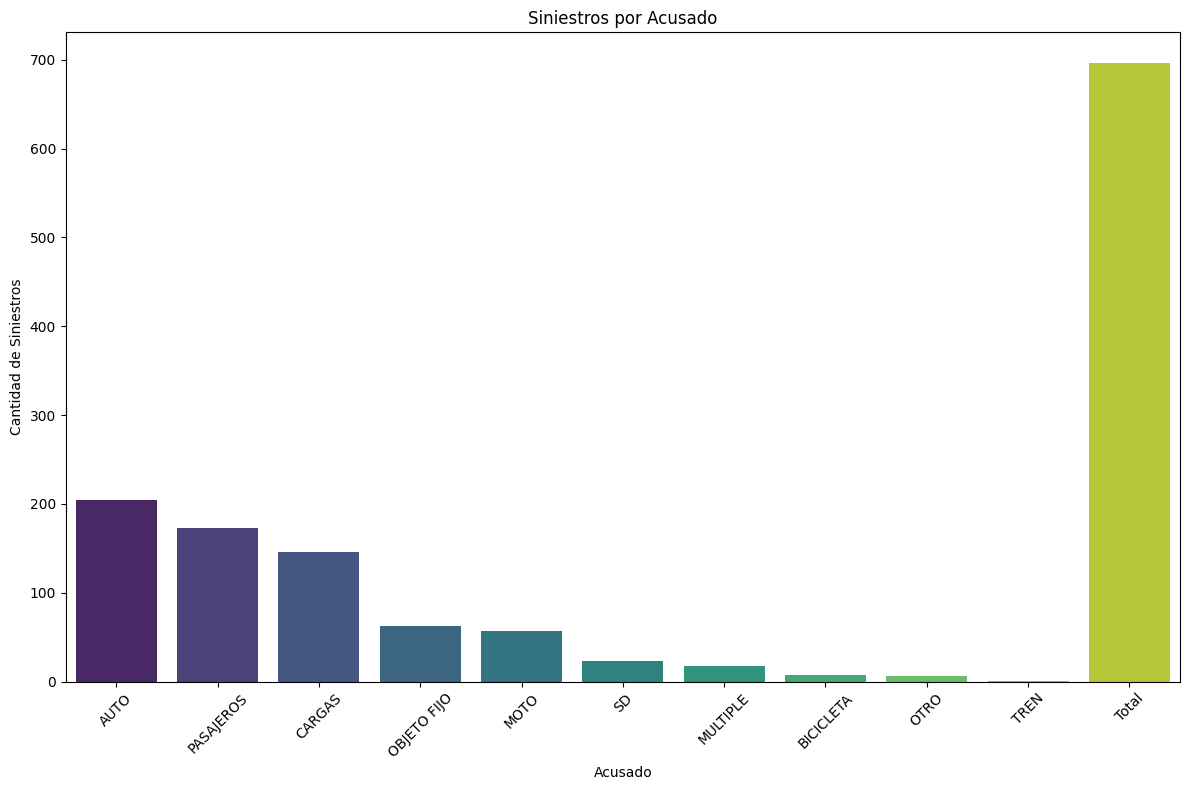

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df_hechos ya está definido

# Contar los siniestros por 'Acusado'
muertes_acusado = df_homicidios['ACUSADO'].value_counts().reset_index()
muertes_acusado.columns = ['Acusado', 'Siniestros']

# Calcular el total de siniestros
total_siniestros = muertes_acusado['Siniestros'].sum()

# Crear una fila para el total
fila_total = pd.DataFrame({'Acusado': ['Total'], 'Siniestros': [total_siniestros]})

# Añadir la fila total al DataFrame
muertes_acusado = pd.concat([muertes_acusado, fila_total], ignore_index=True)

# Calcular el porcentaje
muertes_acusado['Porcentaje'] = (muertes_acusado['Siniestros'] / df_homicidios['N_VICTIMAS'].sum() * 100).round(2)

# Graficar los siniestros por acusado con Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Acusado', y='Siniestros', data=muertes_acusado, palette='viridis')
plt.title('Siniestros por Acusado')
plt.xlabel('Acusado')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


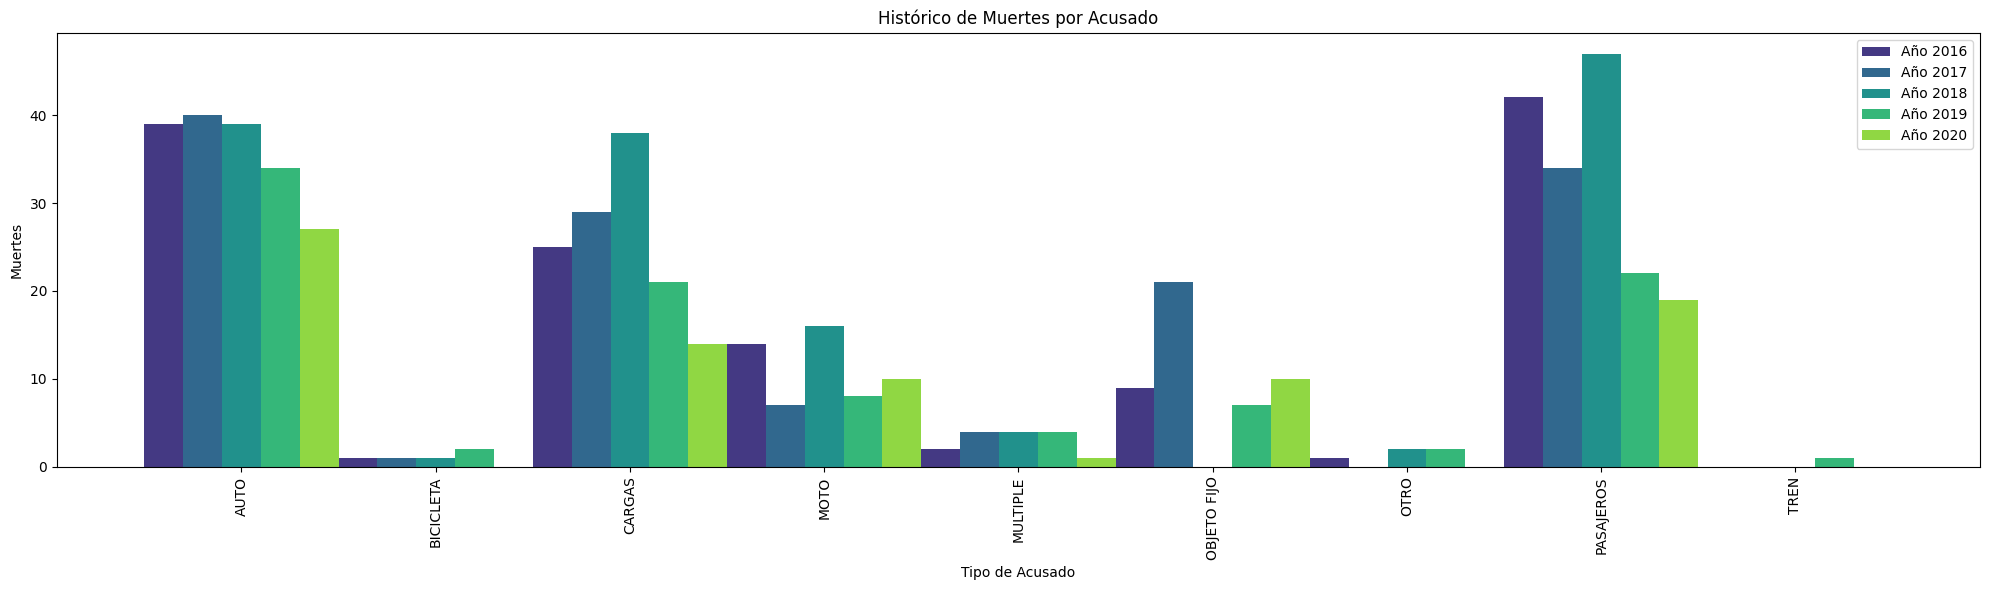

In [176]:
plt.figure(figsize=(20, 6))
bar_width = 0.2
colors = sns.color_palette("viridis", len(range(2016, 2021)))

for i, year in enumerate(range(2016, 2021)):
    # Calcular la posición de las barras para cada año
    bar_positions = np.arange(len(df_pivote.index)) + i * bar_width
    plt.bar(bar_positions, df_pivote[year], width=bar_width, label=f'Año {year}', color=colors[i])

# Configurar etiquetas y título
plt.xlabel('Tipo de Acusado')
plt.ylabel('Muertes')
plt.title('Histórico de Muertes por Acusado')
plt.legend()
plt.xticks(np.arange(len(df_pivote.index)) + bar_width * (len(range(2016, 2021)) / 2 - 0.5), df_pivote.index, rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Analizamos los siniestros por Tipo de via, Acusados y Victimas

In [181]:
def estadisticas_frecuencia_por_comunas(comuna):
    comuna_df = df_homicidios[df_homicidios['COMUNA'] == comuna]
    
    # Calcular las estadísticas sin generar la vía con más siniestros
    via_frecuencia_max_count = comuna_df['TIPO_DE_CALLE'].value_counts().iloc[0]
    via_frecuencia_max_tipo_calle = df_homicidios[df_homicidios['TIPO_DE_CALLE'] == comuna_df['TIPO_DE_CALLE'].value_counts().idxmax()]['TIPO_DE_CALLE'].str.strip('[]').unique()
    
    return pd.DataFrame({
        'Comuna': [comuna],
        'Cantidad de Siniestros': [via_frecuencia_max_count],
        'Tipo de via': [via_frecuencia_max_tipo_calle],
    })

# Ciclo a través de cada comuna y obtén las estadísticas de frecuencia
resultados = []
for comuna in range(1, 16):
    resultados.append(estadisticas_frecuencia_por_comunas(comuna))

# Convierte los resultados en un DataFrame
resultados_df = pd.concat(resultados)
resultados_df.set_index('Comuna', inplace=True)
resultados_df


,Cantidad de Siniestros,Tipo de via
Comuna,,
1,56,[AVENIDA]
2,21,[AVENIDA]
3,26,[AVENIDA]
4,47,[AVENIDA]
5,11,[AVENIDA]
6,16,[AVENIDA]
7,47,[AVENIDA]
8,56,[AVENIDA]
9,50,[AVENIDA]


In [185]:
muertesaño.head()

,MM,accidentes
0,12,78
1,11,67
2,8,65
3,1,62
4,5,60


In [189]:
muertes_via = df_homicidios['TIPO_DE_CALLE'].value_counts().reset_index()
muertes_via.columns = ['Tipo de via', 'accidentes']
total_siniestros = muertesaño['accidentes'].sum()
fila_total = pd.DataFrame({'Tipo de via': ['Total'], 'accidentes': [total_siniestros]})
muertes_via = pd.concat([muertes_via, fila_total], ignore_index=True)
muertes_via['Porcentaje'] = (muertes_via['accidentes'] / total_siniestros * 100).round(2)
print(muertes_via)

  Tipo de via  accidentes  Porcentaje
0     AVENIDA         494       35.49
1       CALLE         136        9.77
2   AUTOPISTA          66        4.74
3       Total        1392      100.00


In [193]:
muertes_via = df_homicidios['ACUSADO'].value_counts().reset_index()
muertes_via.columns = ['Acusado', 'Siniestros']
total_siniestros = muertes_via['Siniestros'].sum()
fila_total = pd.DataFrame({'Acusado': ['Total'], 'Siniestros': [total_siniestros]})
muertes_via = pd.concat([muertes_via, fila_total], ignore_index=True)
muertes_via['Porcentaje'] = (muertes_via['Siniestros'] / total_siniestros * 100).round(2)
print(muertes_via)


        Acusado  Siniestros  Porcentaje
0          AUTO         204       29.31
1     PASAJEROS         173       24.86
2        CARGAS         146       20.98
3   OBJETO FIJO          62        8.91
4          MOTO          57        8.19
5            SD          23        3.30
6      MULTIPLE          17        2.44
7     BICICLETA           7        1.01
8          OTRO           6        0.86
9          TREN           1        0.14
10        Total         696      100.00


## KPIS

### KPI 1

#### Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir población total de CABA
poblacion_total = 3121707

# Número de homicidios en los últimos seis meses y semestre anterior
num_homicidios_ultimos_6_meses = 120  # ejemplo
num_homicidios_semestre_anterior = 135  # ejemplo

# Calcular las tasas de homicidios
tasa_homicidios_actual = (num_homicidios_semestre_anterior / poblacion_total) * 100000
tasa_homicidios_objetivo = tasa_homicidios_actual * 0.90
tasa_homicidios_ultimos_6_meses = (num_homicidios_ultimos_6_meses / poblacion_total) * 100000

# Crear un DataFrame para visualización
df_tasas = pd.DataFrame({
    'Periodo': ['Semestre Anterior', 'Últimos 6 Meses', 'Objetivo'],
    'Tasa de Homicidios': [tasa_homicidios_actual, tasa_homicidios_ultimos_6_meses, tasa_homicidios_objetivo]
})

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_tasas['Periodo'], df_tasas['Tasa de Homicidios'], color='purple')
plt.xlabel('Periodo')
plt.ylabel('Tasa de Homicidios (por 100,000 habitantes)')
plt.title('Comparación de la Tasa de Homicidios en Siniestros Viales')
plt.ylim(0, max(df_tasas['Tasa de Homicidios']) + 2)  # Ajustar el límite del eje Y para mejor visualización

# Mostrar las tasas en las barras
for index, value in enumerate(df_tasas['Tasa de Homicidios']):
    plt.text(index, value + 0.1, f'{value:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


### KPI2

#### Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de accidentes mortales de motociclistas (ejemplo)
accidentes_moto_anterior = 150  # Número de accidentes mortales de motociclistas en el año anterior
accidentes_moto_actual = 135  # Número de accidentes mortales de motociclistas en el último año

# Calcular la evolución de los accidentes mortales
evolucion_accidentes = ((accidentes_moto_anterior - accidentes_moto_actual) / accidentes_moto_anterior) * 100
objetivo_accidentes = accidentes_moto_anterior * 0.93  # Reducción del 7%

# Crear un DataFrame para la visualización
df_accidentes = pd.DataFrame({
    'Periodo': ['Año Anterior', 'Año Actual', 'Objetivo'],
    'Accidentes Mortales': [accidentes_moto_anterior, accidentes_moto_actual, objetivo_accidentes]
})

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_accidentes['Periodo'], df_accidentes['Accidentes Mortales'], color='purple')
plt.xlabel('Periodo')
plt.ylabel('Número de Accidentes Mortales')
plt.title('Evolución de los Accidentes Mortales de Motociclistas')
plt.ylim(0, max(df_accidentes['Accidentes Mortales']) + 20)  # Ajustar el límite del eje Y para mejor visualización

# Mostrar los valores en las barras
for index, value in enumerate(df_accidentes['Accidentes Mortales']):
    plt.text(index, value + 1, f'{value:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Imprimir las tasas y evolución
print(f"Evolución de los Accidentes Mortales: {evolucion_accidentes:.2f}%")
print(f"Objetivo de Accidentes Mortales: {objetivo_accidentes:.2f} accidentes")


### KPI 3

#### Paridad de Género en Seguridad Vial. 
El objetivo es reducir en un 10% la disparidad entre el número de hombres y mujeres fallecidos en accidentes de tránsito durante el próximo año. Esta propuesta busca abordar la problemática de que históricamente los hombres han sido más propensos a sufrir accidentes mortales en comparación con las mujeres. Al establecer este indicador clave de desempeño, se busca implementar medidas específicas para mejorar la seguridad vial de todos los géneros y promover una mayor equidad en este ámbito.
##### El cálculo de este KPI se realizó en Power BI